[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/gawron/python-for-social-science/blob/master/pandas/general_pandas_intro.ipynb)

The goal of this notebook is to introduce the two main `pandas` data types, `DataFrame`  and `Series`, and to introduce to some basic
analytical tools, pivot tables, cross tabulations, and grouping. For much more detailed background on Pandas data structures, see http://pandas.pydata.org/pandas-docs/dev/dsintro.html.

In [1]:
# Import all libraries needed for the tutorial

##import (library) as (give the library a nickname/alias)
import numpy as np
import pandas as pd  
# General syntax to import specific functions in a library: 
##from (library) import (specific library function)
from pandas import DataFrame, read_csv

# The usual preamble when using matplotlib. 
# Most of the code we call is in pyplot.
import matplotlib.pyplot as plt

# Make the graphs a bit prettier, and bigger
#pd.set_option('display.mpl_style', 'default') 
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

This notebook was prepared with the following version
of `pandas`.   The sort of basic functionality illustrated here
shouldn;'t change much from version, but if do have issues reproducing
what's in this notebook, re-execute the next cell and see
if there's a change.  Report the version of pandas you used when reporting
an issue.

In [2]:
print(f'Pandas version {pd.__version__}')

Pandas version 1.5.0


# Create Toy Data  

Let's start with a toy dataset, then we'll ramp up.

The data set will consist of 5 baby names and the number of births recorded for a particular year (1880, as it happens).

**Continuity note**: *This NB combines elements of general_pandas_intro.ipynb with pandas.ipynb and supercedes both of them.**

In [3]:
# The initial set of baby names and birth rates
names = ['Bob','Jessica','Mary','John','Mel','Mel']
gender = ['M','F','F','M','M','F']
births = [968, 155, 77, 578, 973,45]

To merge these two lists together we will use the ***zip*** function.

In [4]:
BabyDataSet = list(zip(names,gender,births))
print(BabyDataSet)

[('Bob', 'M', 968), ('Jessica', 'F', 155), ('Mary', 'F', 77), ('John', 'M', 578), ('Mel', 'M', 973), ('Mel', 'F', 45)]


We next create a DataFrame.

***df*** will be a ***DataFrame*** object. You can think of this object holding the contents of the BabyDataSet in a format similar to a sql table or an excel spreadsheet. Lets take a look below at the contents inside ***df***.

In [5]:
df = DataFrame(data = BabyDataSet, columns=['Names', 'Gender', 'Births'],index = ['b','c','e','a','d','f'])
df

,Names,Gender,Births
b,Bob,M,968
c,Jessica,F,155
e,Mary,F,77
a,John,M,578
d,Mel,M,973
f,Mel,F,45


This `pandas` `DataFrame`
consists of 6 rows and 3 columns.  The letters along the left edge are the **index**.  The index provides names or **handles** for the rows.  The column names provide handles for the columns.

One way to think of a `DataFrame` is as something like a `numpy` 2D array which uses keyword indexing
instead of positional indexing.  Thus instead of thinking of the item `Mary` as being in the  row
indexed by 2 and the column indexed by 0, we think of it as being in the row indexed by `e` and the column
indexed by `Names`.  

The row handles (or index) of a `DataFrame` are both sequences to which
users can have access.  Both contain strings in our example, though
indexes can have more complicated objects (such as time instances).

In [6]:
df.index

Index(['b', 'c', 'e', 'a', 'd', 'f'], dtype='object')

In [7]:
df.columns

Index(['Names', 'Gender', 'Births'], dtype='object')

# A Column is a Series

To explore the idea of  a `DataFrame` as a keyword-indexed 2D array, let's first look at a 1D object
in `pandas`, a single column.

Columns in a pandas `DataFrame` are indexed by the column name:

In [8]:
names_col = df['Names']
names_col

b        Bob
c    Jessica
e       Mary
a       John
d        Mel
f        Mel
Name: Names, dtype: object

As the output shows, the row handles are part of the column object.
so the element  `Mary` can be accessed by handle  `e`.

In [9]:
names_col['e']

'Mary'

So a column is an object like a `numpy` 1D array, but indexed by handles like `b` and `e`.

The data type of a column in `pandas` is `Series`. 

# Pandas Introduction

In [10]:
type(df['Names'])

pandas.core.series.Series

The natural question to ask next is: Are rows also 1D objects in `pandas`?  And the answer is yes.

We demonstrate that next.

# Selecting rows

The simplest way of selecting a `pandas` row is via the `.loc` attribute:

Given a Dataframe and a row handle, `df.loc[RowName]` returns the row:

In [11]:
e_row = df.loc['e']
e_row

Names     Mary
Gender       F
Births      77
Name: e, dtype: object

As promised, this too is a `Series`.

In [12]:
type(e_row)

pandas.core.series.Series

Again it comes with handles for its elements.  In this case those handles are column
names:

In [13]:
e_row['Names']

'Mary'

The `.loc` method was needed to define `e_row` because the `df[keyword]` syntax is reserved for the case
where `keyword` is a column name.  Thus

In [24]:
# This produces a KeyError because 'e' is not a column name.
# df['e']

We've now seen two different ways to access the same `DataFrame` element `Mary`:

In [14]:
df['Names']['e']

'Mary'

Call the notation in the previous cell -- Column handle first, then row handle -- **native pandas
notation**.  In this notation,
the DataFrame is like a dictionary whose keys are column handles, the columns are dictionaries
whose keys are row handles.

We then introduced `.loc`.

In [15]:
df.loc['e']['Names']

'Mary'

Call the notation with `.loc[]`  **numpy-like notation**.  The idea is that expressions with  `.loc[]` work like numpy with keyword indexing instead of positional indexing. First row, then column. So the numpy analogue of the syntax in the last cell is

In [18]:
a = np.arange(12).reshape((3,4))
print("a:\n",a)

r,c,val=2,3,11
print(f'{r=}, {c=} {val=}')

print(f'{a[r][c]=: 3d}')

a:
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
r=2, c=3 val=11
a[r][c]= 11


The analogy can be pushed much further.  Numpy also allows:

In [19]:
a[r,c]

11

Paralleling that in `pandas`, using `.loc[]`, we have:

In [20]:
df.loc['e','Names']

'Mary'

Another similarity  with `numpy` when we use `.loc` is that we can do slicing.

Repeating `df`:

In [21]:
df

,Names,Gender,Births
b,Bob,M,968
c,Jessica,F,155
e,Mary,F,77
a,John,M,578
d,Mel,M,973
f,Mel,F,45


we take a row slice:

In [22]:
print(df.loc['c':'a'])
type(df.loc['c':'a'])

     Names Gender  Births
c  Jessica      F     155
e     Mary      F      77
a     John      M     578


pandas.core.frame.DataFrame

We get a sub-`DataFrame` starting up at row `c`, going up to and including row `e`.

What's a little surprising here is that we got 3 rows, where from all our experience
with normal Python slices, we would expect 2.  This is not a bug; the motivation
is that we are not indexing by position, but by the names of elements
in the index.  When you want to get a slice that goes from row `c` to row `a`,
all you have to know is those two names; if we had to use the same convention
used with slicing by position, we would also have to know the name of the
row following `a`, which isn't in general preductable.

As with `numpy` we can also slice along the column-axis.

In [15]:
df.loc[:,'Gender':'Births']

,Gender,Births
b,M,968
c,F,155
e,F,77
a,M,578
d,M,973
f,F,45


We can also do the `pandas` equivalent equivalent of fancy indexing in `numpy`:  Pass
in a sequence or row handles to get a subset of the rows:

In [23]:
df.loc[['b','c','f']]

,Names,Gender,Births
b,Bob,M,968
c,Jessica,F,155
f,Mel,F,45


As with `numpy` the extra set of square brackets is required.

And of course we can do fancy-indexing with columns as well.    The following command creates a new DataFrame
omitting the gender column:

In [24]:
df.loc[:,['Names','Births']]

,Names,Births
b,Bob,968
c,Jessica,155
e,Mary,77
a,John,578
d,Mel,973
f,Mel,45


So we have indexing by keyword and two 
different ways of specifying it,
native-Pandas natation and numpy-like notation using `.loc[]`.
Does all this mean positional indexing is completely abandoned in `pandas`?

No, as we will see, it's possible, and it's sometimes essential.

# Boolean conditions

The most comon way of selecting rows is with a Boolean sequence.

For example, we can select the first, second and fifth rows directly as follows.

In [30]:
df[[True,True,False,False,True,False]]

,Names,Gender,Births
b,Bob,M,968
c,Jessica,F,155
d,Mel,M,973


Or we can use a Boolean Series constructed from a Boolean condition on column values.

In [31]:
df[df['Names']=='Mel']

,Names,Gender,Births
d,Mel,M,973
f,Mel,F,45


This can also be written

In [32]:
df.loc[df['Names']=='Mel']

,Names,Gender,Births
d,Mel,M,973
f,Mel,F,45


We illustrate these constructions in the next few examples.

## Selecting Rows with Boolean Conditions

Overview: The process of selecting rows by values involves two steps
1. We use a Boolean conditions on a column (a 1D `pandas` Series object) much as we did on `numpy` 1D arrays. The result is a `Boolean Series`.
2. We use the Boolean Series as a mask to select a set of rows, just as we did with arrays.

Placing a Boolean condition on a column works just as
it did in numpy,  The condition is applied elementwise to the elements in the colomn:

In [33]:
print(df['Births'])
print()
print(df['Births'] > 500)

b    968
c    155
e     77
a    578
d    973
f     45
Name: Births, dtype: int64

b     True
c    False
e    False
a     True
d     True
f    False
Name: Births, dtype: bool


The result is also a `Series`  containing Boolean values. 

In [34]:
type(df['Births'] > 500)

pandas.core.series.Series

Continuing the analogy with `numpy`: Just as we could use a 1D Boolean array 
as Boolean mask to index a
numpy 2D array, so we can use a pandas Boolean Series to mask a pandas DataFrame.

In [35]:
df[df['Births'] > 500]

,Names,Gender,Births
b,Bob,M,968
a,John,M,578
d,Mel,M,973


Given `df[BS]`,  where `BS` is a `Boolean Series`,
`pandas` will always try to align `BS`'s index with `df`'s index
to do row selection.  That means
`BS` must have the same index (row handles) as `df`; a mismatch raises an `IndexingError`.

For example, if we tried to use only the first 4 rows of the `Boolean Series`
is the last example, we would get an `IndexingError`:

```
>>> df[(df['Births'] > 500)[:4]]
IndexingError                             Traceback (most recent call last)
/var/folders/w9/bx4mylnd27g_kqqgn5hrn2x40000gr/T/ipykernel_4727/2043702469.py in <module>
----> 1 df[(df['Births'] > 500)[:4]]

....

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).
```


`df[BooleanSeries]` is a synonym of `df.loc[BooleanSeries]`.  Hence, the expression in the next cell selects
the same rows as the row selection in the last example.

In [18]:
df.loc[df['Births'] > 500]

,Names,Gender,Births
b,Bob,M,968
a,John,M,578
d,Mel,M,973


Notice that this expression has two indexing operations, one with
`df.loc` and one without.  The inner one uses what we've 
been calling native pandas like syntax, with a column
specification in the square brackets.  


It's possible to write this entirely in numpy-like 
syntax, but it gets awkward. 

In [19]:
df.loc[df.loc[:,'Births'] > 500]

,Names,Gender,Births
b,Bob,M,968
a,John,M,578
d,Mel,M,973


This awkwardness is merely a consequence of having the `.loc[]` syntax work 
like `numpy`: in each case, it has to be made clear whether rows or columns are being selected.

That fussiness brings with it some flexibility.  We saw above that the `.loc[]` operator
can be used to select columns with fancy-indexing. It can also
select them with a Boolean condition. To omit the `Gender` column, we can do:

In [20]:
df.loc[:,[True,False,True]]

,Names,Births
b,Bob,968
c,Jessica,155
e,Mary,77
a,John,578
d,Mel,973
f,Mel,45


## Combining Conditions with Boolean operators

In `numpy` `&` is an operator that performs an elementwise `and` on two Boolean arrays,
producing a Boolean array that only has `True` wherever both the input arrays have `True`. 

In [39]:
import numpy as np
a = np.array([True,False,True])
b= np.array([False,True,True])
print('a', a)
print('b', b)
print('a & b', a&b)

a [ True False  True]
b [False  True  True]
a & b [False False  True]


Let B1 and B2 be two Boolean Series.

The  `&` operator can also be used to combine two
Boolean Series instances.  The result is a single Boolean Series that finds the rows that satisfy **both** conditions.

In [40]:
df

,Names,Gender,Births
b,Bob,M,968
c,Jessica,F,155
e,Mary,F,77
a,John,M,578
d,Mel,M,973
f,Mel,F,45


In [41]:
df[(df['Births'] > 500) & (df['Births'] < 900)]

,Names,Gender,Births
a,John,M,578


Note that the parentheses are  **needed** here.

As with `numpy` arrays, Series may also be combined with "bitwise not" (`~`) and "bitwise or" (`|`).

The names which were used over 500 times but not 578 times:

In [42]:
df[(df['Births'] > 500) & ~(df['Births'] == 578)]

,Names,Gender,Births
b,Bob,M,968
d,Mel,M,973


Applying the condition that the value in the `Births` column does not fall between 500 and 900,
we exclude the `"John"` row.

In [43]:
df[(df['Births'] < 500) | (df['Births'] > 900)]

,Names,Gender,Births
b,Bob,M,968
c,Jessica,F,155
e,Mary,F,77
d,Mel,M,973
f,Mel,F,45


## Sorting and positional indexing

To find the largest value in a given column, we need to `.sort_values()`
and then use positional indexing (`.iloc[ ]`).

We illustrate by finding
the most popular name (or rather, the baby name with the highest birth rate).

We start by sorting the rows in the baby names `DataFrame df` 
using `.sort_values()`.  We need to sort the rows
**according to values in a particular column**.
This column is called by **by** argument of the `.sort_values()` method.

In [69]:
df

,Names,Gender,Births
b,Bob,M,968
c,Jessica,F,155
e,Mary,F,77
a,John,M,578
d,Mel,M,973
f,Mel,F,45


In [21]:
# Method 1 
Sorted_df = df.sort_values(by='Births', ascending= False)
Sorted_df

,Names,Gender,Births
d,Mel,M,973
b,Bob,M,968
a,John,M,578
c,Jessica,F,155
e,Mary,F,77
f,Mel,F,45


We now want the **first row** of `Sorted_df`;
so we are in a situation where keyword-indexing is of no help
(of course, we can see in the output
that the handle of the row we want is `d`, but in general 
we won't know what the top ranked handle is after a sort).

So here's the perfect use-case for positional indexing
for which `pandas` provides the `.iloc[]` method,
which has a syntax very similar to `.loc[]`.

In [104]:
# Get the first row after the sort
Sorted_df.iloc[0]

Names     Mel
Gender      M
Births    973
Name: d, dtype: object

The name `iloc` can be thought of as short for `index location`.

The index of a `DataFrame` is itself a sequence,
and that sequence can only be indexed by position.
Therefore, the `.iloc` expression above is equivalent to:

In [106]:
Sorted_df.loc[Sorted_df.index[0]]

Names     Mel
Gender      M
Births    973
Name: d, dtype: object

We summarize what we just by writing it all in one line.

Here's how to find the most popular name (by births).

In [107]:
df.sort_values('Births', ascending= False).iloc[0]

Names     Mel
Births    973
Name: 4, dtype: object

Note that although we can just as easily sort a column (Series) as a DataFrame,
it will be more work to find the associated value in another column.

Illustrating:

In [28]:
print(df['Births'])
SortedBirths = df['Births'].sort_values(ascending=False)
print(SortedBirths)

b    968
c    155
e     77
a    578
d    973
f     45
Name: Births, dtype: int64
d    973
b    968
a    578
c    155
e     77
f     45
Name: Births, dtype: int64


Now `SortedBirths.iloc[0]`is 973; to get the most popular name, we have do:

In [33]:
df.loc[SortedBirths.index[0]]['Names']

'Mel'

## Loading the entire BabyNames dataset

The next cell loads data from the github site and will take some time to execute.  
It is slow because
it is retrieving a number of large uncompressed files.  
Each file represents a different year of 
comma-separated (hence .csv format) babynames data. For example, the start of `yob1881.txt` looks like this:

```
Mary,F,7065
Anna,F,2604
Emma,F,2003
Elizabeth,F,1939
Minnie,F,1746
```

The code cell below  will build a `names` DataFrame similar
to that of our toy example, but much larger and with two new columns, `"sex"` and `"year"`.

In [22]:
import pandas as pd
years = list(range(1880,2011))
pieces = []
columns = ['name','sex','births']

url = 'https://raw.githubusercontent.com/gawron/'\
       'python-for-social-science/master/pandas/names/'
for year in years:
    path = f'{url}yob{year:d}.txt'
    frame = pd.read_csv(path,names=columns)
    frame['year'] = year
    pieces.append(frame)    
    
names = pd.concat(pieces, ignore_index=True)

We first build the list `pieces` in the `for`-loop; `pieces` is a list of DataFrames. 
As we process each data file, we keep track of the year 
by adding a `'year'` column to the DataFrame.
We then concatenate that list into a single large frame called `names`, ignoring the indexes in the old frames.  We ignore the indexes because they will all be number ranges starting with 0, and rather than have a large number of rows indexed `1` (1 from each year), we renumber them all.

Think about why it's hard to build the list `pieces` with a list comprehension instead of  the way it's done in the above cell.
Notice the following doesn't work.  Python requires an expression
as the first component of a list comprehension.  One reason for this is that list comprehensions are supposed to improve readability.  Complex sequences of commands don't do that, and the `for`-loop above is much more understandable.

```
pieces = [f=pd.read_csv('names/yob{0:d}.txt'.format(year),names=columns);
          f['year']=year; f
          for year in years]
```

If you were successful the next cell should evaluate to `True`.  Please re-evaluate the next cell to check.

In [72]:
len(names)  == 1_690_784

True

We now have a large `DataFrame` of approximately 1.7 million rows, with a default (numerical) index:

In [48]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


The new DataFrame has 1,690,784 rows and 4 columns.

In [73]:
names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1690784 entries, 0 to 1690783
Data columns (total 4 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   name    1690784 non-null  object
 1   sex     1690784 non-null  object
 2   births  1690784 non-null  int64 
 3   year    1690784 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 51.6+ MB


## Selection Examples: Selecting parts of data frames (baby names data)

Having created a much larger Pandas DataFrame with babynames data,  
we now use that data return to give more examples of selecting data.   

We have data for the years 1880 through 2010.  Let's select one year.

In [23]:
names1881 = names[names['year'] == 1881]

In [24]:
names1881

,name,sex,births,year
2000,Mary,F,6919,1881
2001,Anna,F,2698,1881
2002,Emma,F,2034,1881
2003,Elizabeth,F,1852,1881
2004,Margaret,F,1658,1881
...,...,...,...,...
3930,Wiliam,M,5,1881
3931,Wilton,M,5,1881
3932,Wing,M,5,1881
3933,Wood,M,5,1881


Note that index starts with 2000 because we have retrieved a subset of
the rows in the `names` data, preserving the indexing.

Retrieve the gender column, and display the last part.

In [14]:
names1881['sex'].tail()

3930    M
3931    M
3932    M
3933    M
3934    M
Name: sex, dtype: object

If we apply a Boolean test to the `'sex'` column, we see evidence that the 1881 names  are gender sorted, with the female names occupying approximately the last half of the data. This is in fact true of ever year.

In [50]:
print(type(names1881['sex']=='F'))
names1881['sex']=='F'

<class 'pandas.core.series.Series'>


2000     True
2001     True
2002     True
2003     True
2004     True
        ...  
3930    False
3931    False
3932    False
3933    False
3934    False
Name: sex, Length: 1935, dtype: bool

Using the analogue of fancy-indexing in
numpy arrays (a list of indices selects a list of rows), you can pick out a subdata frame with a subset of columns, using a list of column names:

In [24]:
print(type(names1881[['sex','births']]))
names1881[['sex','births']]

<class 'pandas.core.frame.DataFrame'>


,sex,births
2000,F,6919
2001,F,2698
2002,F,2034
2003,F,1852
2004,F,1658
...,...,...
3930,M,5
3931,M,5
3932,M,5
3933,M,5


The indexing conventions we observed in the toy example work here.

indexing a series with a valid index member yields the value at that
position in the series:

In [51]:
names1881['sex'][2000]

'F'

In [52]:
names1881['sex'].iloc[0]

'F'

That's why a Series is referred to as an *ordered set* in the Pandas documentation.  There are usually no duplicate names, as with dictionary keys, but there is also ordering.

As we saw with teh toy data, you can use that series as a mask to create to create a sub-`Data Frame` of the original `DataFrame` that has only the rows with name `"Lee"`.

In [25]:
print(type(names1881['name']=='Lee'))
lee_rows = names1881[names1881['name']=='Lee']
print(type(lee_rows))
lee_rows

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


,name,sex,births,year
2258,Lee,F,39,1881
2981,Lee,M,342,1881


So `lee_rows` is a `DataFrame` containing only the rows for people named "Lee".  

This example also shows why we shouldn't use the `name` column to index the data.  There are names that occur in two rows, because they are both male and female names.

You can also pick out a sub data frame with just the female names. We do that and query the "sex" column to show we've got a `female_rows` `DataFrame` 

In [26]:
female_rows1881 = names1881[names1881['sex']=='F']
print(type(female_rows1881))
female_rows1881.tail()

<class 'pandas.core.frame.DataFrame'>


,name,sex,births,year
2933,Tinie,F,5,1881
2934,Tiny,F,5,1881
2935,Vernon,F,5,1881
2936,Verona,F,5,1881
2937,Viney,F,5,1881


Since there are no male rows in `female_rows1881`, this is an empty DataFrame:

In [55]:
female_rows1881[female_rows1881['sex'] == 'M']

,name,sex,births,year


We see that the female 1881 rows comprise about half the 1881 data.

In [57]:
len(female_rows1881)

938

In [58]:
len(names1881)

1935

### Summary/Review:  Selection & Indexing

In [2]:
# Example df for the summary below, lower-case for the index, upper-case for the col names
import pandas as pd
df = pd.DataFrame.from_dict(dict(a=[1,11,111],
                                 b=[2,22,222],
                                 c=[3,33,333],
                                 aa=[1,11,111],
                                 bb=[2,22,222],
                                 cc=[3,33,333]),
                                 orient='index',  # the keyword labeled items are rows
                                 columns=['A',"B","C"]  # need to label the columns independently
                           )
df
                            

,A,B,C
a,1,11,111
b,2,22,222
c,3,33,333
aa,1,11,111
bb,2,22,222
cc,3,33,333


Here is a series of examples using the toy example above, summarizing what we've learned so far
about selecting `pandas DataFrame` rows and columns.  In each case the type of `pandas` object retutned by the selection expression is given.  `Data Type` refers to the type of data being stored in a particular cell of the `DataFrame` (in our example that's always `int`).

In [3]:
print("\nDataFrame")
print(df)
print("\nrow selection numpylike df.loc['c'] pd.Series")
print(df.loc['c'])
print("\nrow slice numpylike df.loc['c': 'bb'] pd.DataFrame")
print(df.loc['c': 'bb'])
print("\nrow col native pandas df['A']['c'] Data Type(int)")
print(df['A']['c'])
print("\nrow col numpylike df.loc['c','A'] Data Type(int)")
print(df.loc['c']['A'])
print("\nbool series native pandas df['A'] == 2 Pd.Series (Boolean)")
print(df['A'] == 2)
print("\nbool selection native pandas df[df['A'] == 2] pd.DataFrame")
print(df[df['A'] == 2])
print("\nbool selection numpy like df.loc[df['A'] == 2] pd.DataFrame")
print(df.loc[df['A'] == 2])
print("\nrow (position) df.iloc[2] pd.Series")
print(df.iloc[2] )
print("\ncol (position) df.iloc[:,2] pd.Series")
print(df.iloc[:,2])
print("\n fancy indexing cols native pandas df[['A','C']] pd.DataFrame")
print(df[['A','C']])
print("\n fancy indexing cols numpylike df.loc[:,['A','C']] pd.DataFrame")
print(df.loc[:,['A','C']])
print("\n fancy indexing rows df.loc[['b','bb'] pd.DataFrame")
print(df.loc[['b','bb']])


DataFrame
    A   B    C
a   1  11  111
b   2  22  222
c   3  33  333
aa  1  11  111
bb  2  22  222
cc  3  33  333

row selection numpylike df.loc['c'] pd.Series
A      3
B     33
C    333
Name: c, dtype: int64

row slice numpylike df.loc['c': 'bb'] pd.DataFrame
    A   B    C
c   3  33  333
aa  1  11  111
bb  2  22  222

row col native pandas df['A']['c'] Data Type(int)
3

row col numpylike df.loc['c','A'] Data Type(int)
3

bool series native pandas df['A'] == 2 Pd.Series (Boolean)
a     False
b      True
c     False
aa    False
bb     True
cc    False
Name: A, dtype: bool

bool selection native pandas df[df['A'] == 2] pd.DataFrame
    A   B    C
b   2  22  222
bb  2  22  222

bool selection numpy like df.loc[df['A'] == 2] pd.DataFrame
    A   B    C
b   2  22  222
bb  2  22  222

row (position) df.iloc[2] pd.Series
A      3
B     33
C    333
Name: c, dtype: int64

col (position) df.iloc[:,2] pd.Series
a     111
b     222
c     333
aa    111
bb    222
cc    333
Name: C, dtype: int64


Reviewing and summarizing the discussion  above using this example

 
| Selection | Native Pandas  |  Numpy-like     |
| :-- | :-: | :-: |
|  row      | NA | df.loc['c'] |
| row slice |  NA           |df.loc['c': 'bb'] |
|  col | df['A'] | df.loc[:,'A'] |
| row, col | df['A']['c'] | df.loc['c','A'] |
|          |               | df.loc['c']['A'] |
| bool series | df['A'] == 2 | Not used |
| bool selection | df[df['A'] == 2] | df.loc[df['A'] == 2] |
| row (position) |   NA             | df.iloc[2]  |
| col (position)      |   NA             | df.iloc[:,2] |
| fancy (cols)    |  df[['A','C']]   | df.loc[:,['A','C']] 
| fancy (rows)    |  NA   | df.loc[['b','bb']] 


### The .value_counts( ) method

Suppose we want to learn the number of distinct male and female names. 


The easiest way to get that information is by using the Series method
`S.value_counts()`, where `S` is `Series`. This method creates a new Series `vc` indexed by the distinct values of `S`: the value for each index element of `vc` is the count of how many times that index element occurred in `S`.

In [30]:
names1881 = names[names['year']==1881]


names1881['sex'].value_counts()

M    997
F    938
Name: sex, dtype: int64

The sum of the value counts equals the number of rows in `names1881`:

In [31]:
len(names1881)

1935

In [38]:
names1881['sex'].value_counts().sum()

1935

It turns out Series have a plot method; applying that method to the value_counts  Series, we get:

<AxesSubplot:title={'center':'1881: Number of Names by Gender'}>

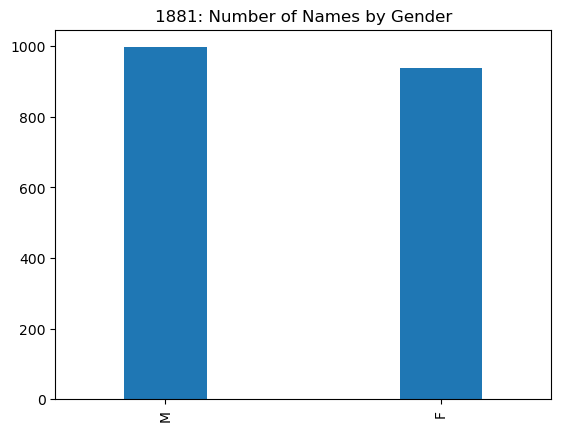

In [32]:
names1881['sex'].value_counts().plot(kind='bar',
                                     width=.3,
                                     title='1881: Number of Names by Gender')

This is our first very simple example of analytical strategy we will use often with `pandas`:

1. Use one of `pandas` analytical tools to transform the data into a new DataFrame or Series.
2. Exploit the fact that the transformed data has restructured the index and the columns to make a plot summarizing our analysis.

The plot above shows there were fewer female names than male names in 1881.  In fact,

In [33]:
female_names1881 = names1881[names1881['sex']=='F']
len(female_names1881)/len(names1881)

0.4847545219638243

only about 48.5% of the names in use were female.

Translating this code to the entire `names` data set (1881-2010), we see an interesting change.

In [33]:
print(type(names['sex']=='F'))
female_names = names[names['sex']=='F']
len(female_names)/len(names)

<class 'pandas.core.series.Series'>


0.5937984982114806

<AxesSubplot:title={'center':'1881--2007: Number of Names by Gender'}>

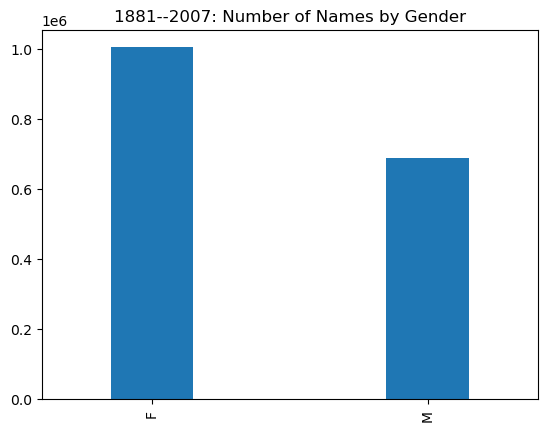

In [34]:
names['sex'].value_counts().plot(kind='bar',width=.3, 
                                 title='1881--2007: Number of Names by Gender')

We see the female rows occupy nearly 60% of the data, meaning that some time
after 1881 the diversity of female names overtook and greatly surpassed
that of male names.

#### Cross-tabulation

To introduce cross-tabulation we will explore the fact we just discovered, that
the proportion of female names increases over time.

Let's first create a table that tracks the number of female names and male names
year by year.  To do this we want to count the number of times `M` occurs
in the `Sex` column with each year and compare it to the number of times `F` 
occurs in the `Sex ` column with each year.  

That's cross tabulation.  We've got 2 columns with categorical value sets
(`Sex` and `year`). In those two columns, an
individual row gives us a pair like ('M', 1881)
or ('F', 1881).  

In [56]:
names[(names['year'] == 1881)&(names['sex'] == 'F')][['sex','year']][:1]

,sex,year
2000,F,1881


In [55]:
names[(names['year'] == 1881)&(names['sex'] == 'M')][['sex','year']][:1]

,sex,year
2938,M,1881


We want to count how many times each pair occurs.

In [44]:
cts = pd.crosstab(names['year'],names['sex'],margins=True)

In [45]:
cts

sex,F,M,All
year,,,
1880,942,1058,2000
1881,938,997,1935
1882,1028,1099,2127
1883,1054,1030,2084
1884,1172,1125,2297
...,...,...,...
2007,20520,14363,34883
2008,20416,14590,35006
2009,20123,14479,34602


And now we can look at how female name diversity tracks with male name diversity across the
years of our dataset.

<AxesSubplot:xlabel='year'>

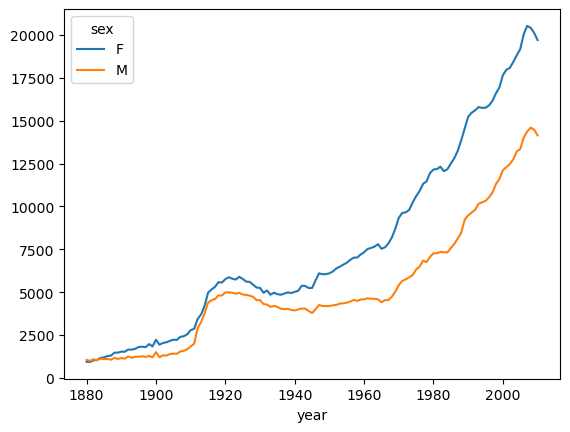

In [43]:
cts.plot()

If we want to look at proportion of female names versus proportion of male names, we could do this:

In [36]:
# Turn the counts int0 proportions (rows add up to 1)
cts2 = pd.crosstab(names['year'],names['sex'],normalize='index')

In [48]:
cts2

sex,F,M
year,,
1880,0.471000,0.529000
1881,0.484755,0.515245
1882,0.483310,0.516690
1883,0.505758,0.494242
1884,0.510231,0.489769
...,...,...
2006,0.588384,0.411616
2007,0.588252,0.411748
2008,0.583214,0.416786


<AxesSubplot:xlabel='year'>

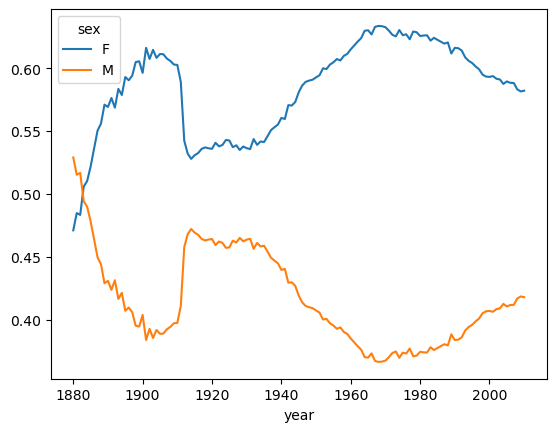

In [49]:
cts2.plot()

This gets a strange plot, because each blue line value and each orange-line value add 
up to 1 (so when blue rises, orange must go down).  Put another way,
when we're visualizing proportions, one of the two lines
is redundant.

So we plot just one line, by running plot on the `F` column:

<AxesSubplot:xlabel='year'>

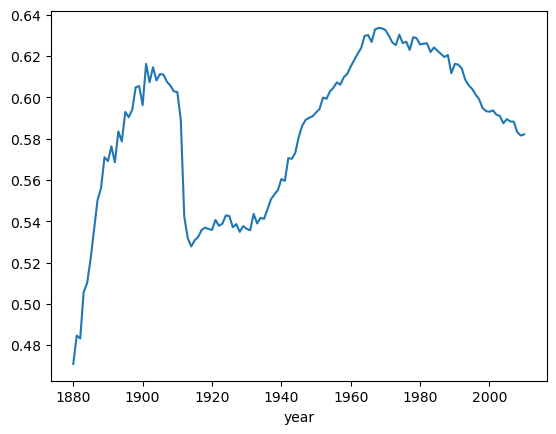

In [60]:
cts2['F'].plot()

The answer is surprising.  Female name diversity is not as simple as a continuously rising 
trend.

To augment this picture with a 50% line to show the years where female
names are in the majority, we can 
add a new column to `cts2` for the 50% line, and plot the `F`
column and the new column.

<AxesSubplot:title={'center':'Percent Female Names by Year'}, xlabel='Year', ylabel='Percent Female Names'>

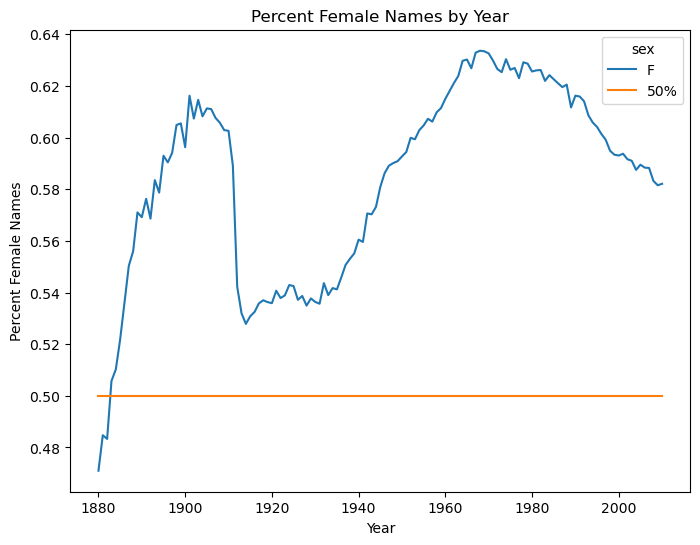

In [37]:
#df2 = pd.DataFrame(f_row)
cts2['50%'] = .5
gender_cts_by_year = cts2[['F','50%']]
gender_cts_by_year.plot(ylabel='Percent Female Names',xlabel='Year',
         title='Percent Female Names by Year', figsize=(8,6))

If what you're doing is a pretty standard piece of
data analysis, chances are good that `pandas` includes a simple way
of doing it.

Read some documentation to find potential tools.  Consult stackoverflow for code
snippets and pointers on where to look in the doumentation.

# Complaints: a new dataset

We're going to use a new dataset here, to demonstrate how to deal with datasets with few numerical attributes,
or, to put it another way, a large variety of categorical attributes.

The next cell provides a URL for a subset of the of 311 service requests from [NYC Open Data](https://nycopendata.socrata.com/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9). 

In [2]:
import os.path
#How to break up long strings into multiline segments
#Note the use of "line continued" character \
data_url = 'https://raw.githubusercontent.com/gawron/python-for-social-science/master/'\
'pandas/datasets/311-service-requests.csv'

In [3]:
import pandas as pd
# Some columns are of mixed types.  This is OK.  But we have to set 
# low_memory=False
complaints = pd.read_csv(data_url,low_memory=False)

In [4]:
complaints.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111069 entries, 0 to 111068
Data columns (total 52 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      111069 non-null  int64  
 1   Created Date                    111069 non-null  object 
 2   Closed Date                     60270 non-null   object 
 3   Agency                          111069 non-null  object 
 4   Agency Name                     111069 non-null  object 
 5   Complaint Type                  111069 non-null  object 
 6   Descriptor                      110613 non-null  object 
 7   Location Type                   79022 non-null   object 
 8   Incident Zip                    98807 non-null   object 
 9   Incident Address                84441 non-null   object 
 10  Street Name                     84432 non-null   object 
 11  Cross Street 1                  84728 non-null   object 
 12  Cross Street 2  

Note that the `df.info()` summary shows how many non-null values there are in each column,
so that you can see there are some columns with very few meaningful entries.

You can see null-entries in the first 5 rows: They are the entries printed out as `NaN`.

`NaN` is short for "Not a Number".  It is the standard representation of an undefined result for a numerical calculation.  Here it is being used to mean "No data entered here";
`NaN` is very commonly used with this meaning in pandas, even in columns that do not have a numerical type; we could, alternatively,  use Python `None` for this purpose.

In [41]:
complaints[:5]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,169 STREET,90 AVENUE,91 AVENUE,NaN,NaN,ADDRESS,JAMAICA,NaN,Precinct,Assigned,10/31/2013 10:08:41 AM,10/31/2013 02:35:17 AM,12 QUEENS,QUEENS,1042027.0,197389.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,58 AVENUE,58 PLACE,59 STREET,NaN,NaN,BLOCKFACE,MASPETH,NaN,Precinct,Open,10/31/2013 10:01:04 AM,NaN,05 QUEENS,QUEENS,1009349.0,201984.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,BROADWAY,WEST 171 STREET,WEST 172 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,10/31/2013 10:00:24 AM,10/31/2013 02:39:42 AM,12 MANHATTAN,MANHATTAN,1001088.0,246531.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,WEST 72 STREET,COLUMBUS AVENUE,AMSTERDAM AVENUE,NaN,NaN,BLOCKFACE,NEW YORK,NaN,Precinct,Closed,10/31/2013 09:56:23 AM,10/31/2013 02:21:10 AM,07 MANHATTAN,MANHATTAN,989730.0,222727.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,WEST 124 STREET,LENOX AVENUE,ADAM CLAYTON POWELL JR BOULEVARD,NaN,NaN,BLOCKFACE,NEW YORK,NaN,NaN,Pending,11/30/2013 01:53:44 AM,10/31/2013 01:59:54 AM,10 MANHATTAN,MANHATTAN,998815.0,233545.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.807691,-73.947387,"(40.80769092704951, -73.94738703491433)"


# 2.2 Selecting columns and rows

As before we can select a column, by indexing with the name of the column:

In [42]:
complaints['Complaint Type']

0         Noise - Street/Sidewalk
1                 Illegal Parking
2              Noise - Commercial
3                 Noise - Vehicle
4                          Rodent
                   ...           
111064    Maintenance or Facility
111065            Illegal Parking
111066    Noise - Street/Sidewalk
111067         Noise - Commercial
111068           Blocked Driveway
Name: Complaint Type, Length: 111069, dtype: object

As above we select rows by constructing Boolean Series:

In [43]:
nypd_bool = (complaints['Agency'] == 'NYPD')
nypd_bool[:10]

0     True
1     True
2     True
3     True
4    False
5     True
6     True
7     True
8     True
9     True
Name: Agency, dtype: bool

We construct a sub frame that has only Police Department complaints.

In [44]:
nypd_df = complaints[nypd_bool]

But there are 20 kinds of PD complaints in this data.

In [45]:
complaint_set = nypd_df['Complaint Type'].unique()
complaint_set

array(['Noise - Street/Sidewalk', 'Illegal Parking', 'Noise - Commercial',
       'Noise - Vehicle', 'Blocked Driveway', 'Noise - House of Worship',
       'Homeless Encampment', 'Noise - Park', 'Drinking', 'Panhandling',
       'Derelict Vehicle', 'Bike/Roller/Skate Chronic', 'Animal Abuse',
       'Traffic', 'Vending', 'Graffiti', 'Posting Advertisement',
       'Urinating in Public', 'Disorderly Youth', 'Illegal Fireworks'],
      dtype=object)

So we limit it further:

In [46]:
il_df = nypd_df[nypd_df['Complaint Type'] == 'Illegal Parking']

More constraints means progressively smaller DataFrames:

In [47]:
(len(complaints), len(nypd_df), len(il_df))

(111069, 15295, 3343)

The indexing syntax is also the one that extends to accommodate
selection of multiple columns, using the fancy-indexing convention from `numpy`
(index via an arbitrary sequence of indices).

In [ ]:
complaints[['Complaint Type', 'Borough']][:10]

,Complaint Type,Borough
0,Noise - Street/Sidewalk,QUEENS
1,Illegal Parking,QUEENS
2,Noise - Commercial,MANHATTAN
3,Noise - Vehicle,MANHATTAN
4,Rodent,MANHATTAN
5,Noise - Commercial,QUEENS
6,Blocked Driveway,QUEENS
7,Noise - Commercial,QUEENS
8,Noise - Commercial,MANHATTAN
9,Noise - Commercial,BROOKLYN


Narrowing down the set of columns is a common step, especially important
when performing further analytical caulculations like pivot tables.

### Using crosstab with the complaints data 

**Complaints Problem A**: For each agency, find its frequency in each borough.

This is a cross-tabulation question: We use `crosstab` to get the joint distribution counts for  two attributes.  

In [290]:
pd.crosstab(complaints['Agency'],complaints['Borough'])

Borough,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND,Unspecified
Agency,,,,,,
3-1-1,0,8,11,12,1,60
CHALL,0,0,0,0,0,77
COIB,0,0,0,0,0,1
DCA,155,357,358,284,36,215
DEP,791,2069,3419,1916,690,12
DFTA,4,5,3,3,0,7
DHS,6,31,54,8,0,2
DOB,358,775,477,1257,147,0
DOE,17,26,24,15,7,8


**Elaboration of Complaints Problem A**:  For each agency, find its frequency in each borough. 
Also give the total number of complaints by borough and by complaint type.

In [48]:
ct_agency_borough = pd.crosstab(complaints['Agency'],complaints['Borough'],margins=True)
ct_agency_borough

Borough,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND,Unspecified,All
Agency,,,,,,,
3-1-1,0,8,11,12,1,60,92
CHALL,0,0,0,0,0,77,77
COIB,0,0,0,0,0,1,1
DCA,155,357,358,284,36,215,1405
DEP,791,2069,3419,1916,690,12,8897
DFTA,4,5,3,3,0,7,22
DHS,6,31,54,8,0,2,101
DOB,358,775,477,1257,147,0,3014
DOE,17,26,24,15,7,8,97


Now `ct_agency_borough` contains both an `'All'` column (containing the
sum of the values in each row) and an `'All'` row (containing the sum of
the values for each column).

Note that as long as there are no rows missing an `'Agency'` or `'Borough'` (there aren't), or complaintgs with more than one type or more than one borough, then `ct_agency_borough['All']['All']` is the total number of rows in the original `complaints` DF.

In [60]:
print(len(complaints))
print(ct_agency_borough['All']['All'])

111069
111069


Here is the transpose of the above DataFrame.  
In other words, the answer to the query: For each borough, find the frequency of its complaints for each complaint type.

In [291]:
pd.crosstab(complaints['Borough'],
            complaints['Complaint Type'])

Complaint Type,APPLIANCE,Adopt-A-Basket,Agency Issues,Air Quality,Animal Abuse,Animal Facility - No Permit,Animal in a Park,Asbestos,BEST/Site Safety,Beach/Pool/Sauna Complaint,...,Unsanitary Pigeon Condition,Urinating in Public,Vacant Lot,Vending,Violation of Park Rules,Water Conservation,Water Quality,Water System,Window Guard,X-Ray Machine/Equipment
Borough,,,,,,,,,,,,,,,,,,,,,
BRONX,108,0,0,40,162,0,17,17,12,0,...,8,2,20,23,17,15,13,278,0,0
BROOKLYN,175,0,0,125,0,4,15,29,16,6,...,10,12,61,35,8,31,28,517,1,0
MANHATTAN,89,3,0,203,2,2,23,60,18,0,...,11,10,8,119,46,21,26,961,1,0
QUEENS,67,0,0,76,0,0,16,30,5,1,...,12,6,29,49,13,53,12,552,0,1
STATEN ISLAND,6,0,0,15,0,2,13,7,1,0,...,0,0,25,3,6,10,10,326,0,0
Unspecified,0,0,174,0,0,0,0,0,0,0,...,0,0,3,0,0,0,0,2,0,0


**Complaints Problem B**:  What's the noisiest borough? A little preprocessing is required.  Then we
can turn this into a cross tabulation of a restricted set of complaint types and borough.

In [5]:
boolean_series = complaints['Complaint Type'].str.startswith('Noise')
complaints_noise = complaints[boolean_series]
complaints_noise[:5]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)"
5,26592370,10/31/2013 01:46:52 AM,NaN,NYPD,New York City Police Department,Noise - Commercial,Banging/Pounding,Club/Bar/Restaurant,11372,37 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.749989,-73.881988,"(40.7499893014072, -73.88198770727831)"
7,26595195,10/31/2013 01:44:19 AM,10/31/2013 01:58:49 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11417,137-09 CROSSBAY BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.671816,-73.843092,"(40.67181584567338, -73.84309181950769)"


Now see if you can turn this into a cross tabulation that tells us
the noise complaint counts for each type of noise complaint 
for each borough, but also contains the answer to question "What's
the noisest borough?"

In [6]:
# oomplaints_noise
# pd.crosstab
# 'Complaints Type',  'Borough'
ct0 = pd.crosstab(complaints_noise['Borough'], complaints_noise['Complaint Type'],margins=True)

In [55]:
ct0

Complaint Type,Noise,Noise - Commercial,Noise - Helicopter,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,All
Borough,,,,,,,,
BRONX,168,136,1,11,9,292,102,719
BROOKLYN,767,775,23,23,60,456,237,2341
MANHATTAN,1848,1140,66,16,91,917,255,4333
QUEENS,418,451,9,15,27,226,130,1276
STATEN ISLAND,115,76,0,2,4,36,25,258
Unspecified,5,0,0,0,0,1,1,7
All,3321,2578,99,67,191,1928,750,8934


So what's the noisiest borough?  The answer is no surprise to those who've been in NYC.

In [56]:
ct0.sort_values('All',ascending=False).index[1]

'MANHATTAN'

Or we can do the do the cross-tabulating and sorting in one step:

In [7]:
sct = pd.crosstab(complaints_noise['Borough'], complaints_noise['Complaint Type'],
            margins=True).sort_values('All',ascending=False)
sct

Complaint Type,Noise,Noise - Commercial,Noise - Helicopter,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,All
Borough,,,,,,,,
All,3321,2578,99,67,191,1928,750,8934
MANHATTAN,1848,1140,66,16,91,917,255,4333
BROOKLYN,767,775,23,23,60,456,237,2341
QUEENS,418,451,9,15,27,226,130,1276
BRONX,168,136,1,11,9,292,102,719
STATEN ISLAND,115,76,0,2,4,36,25,258
Unspecified,5,0,0,0,0,1,1,7


In [77]:
sct.index[1]

'MANHATTAN'

Addendum (data-type specific):

For better understanding of what consitutes a noise complaint we can look
at the descriptions in the `Descriptor` column of the DataFrame that
has been restricted to noise complaints.

In [8]:
# Collect the distinct descriptors for noise complaints (using the rows for which
# the Descriptor column is non-null)
noi_d = complaints_noise[complaints_noise['Descriptor'].notnull()]['Descriptor'].unique()

In [161]:
noi_d

array(['Loud Talking', 'Loud Music/Party', 'Car/Truck Horn',
       'Banging/Pounding', 'Engine Idling', 'Car/Truck Music',
       'Noise: Construction Before/After Hours (NM1)',
       'Noise, Barking Dog (NR5)', 'Other', 'Noise: Jack Hammering (NC2)',
       'Noise: Alarms (NR3)', 'Noise: Boat(Engine,Music,Etc) (NR10)',
       'Noise: air condition/ventilation equipment (NV1)',
       'Noise: Construction Equipment (NC1)',
       'Noise: Private Carting Noise (NQ1)',
       'Noise:  lawn care equipment (NCL)', 'NYPD',
       'Noise: Manufacturing Noise (NK1)',
       'Noise: Other Noise Sources (Use Comments) (NZZ)',
       'Horn Honking Sign Requested (NR9)',
       'Noise, Ice Cream Truck (NR4)', 'News Gathering',
       'Noise: Loud Music/Daytime (Mark Date And Time) (NN1)',
       'Noise, Other Animals (NR6)', 'Loud Television'], dtype=object)

**Complaints problem C**

Find the complaint counts for three agences ('DOT', "DOP", 'NYPD').

Steps:

First Produce a DataFrame containing only the three agencies DT, DOP and NYPD.  This part is easy.

In [78]:
#BS = ??  # .isin(('DOT', "DOP", 'NYPD'))
BS = complaints['Agency'].isin(('DOT', "DOP", 'NYPD'))
sub_complaints = complaints[BS]
sub_complaints

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,169 STREET,90 AVENUE,91 AVENUE,NaN,NaN,ADDRESS,JAMAICA,NaN,Precinct,Assigned,10/31/2013 10:08:41 AM,10/31/2013 02:35:17 AM,12 QUEENS,QUEENS,1042027.0,197389.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,58 AVENUE,58 PLACE,59 STREET,NaN,NaN,BLOCKFACE,MASPETH,NaN,Precinct,Open,10/31/2013 10:01:04 AM,NaN,05 QUEENS,QUEENS,1009349.0,201984.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,BROADWAY,WEST 171 STREET,WEST 172 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,10/31/2013 10:00:24 AM,10/31/2013 02:39:42 AM,12 MANHATTAN,MANHATTAN,1001088.0,246531.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,WEST 72 STREET,COLUMBUS AVENUE,AMSTERDAM AVENUE,NaN,NaN,BLOCKFACE,NEW YORK,NaN,Precinct,Closed,10/31/2013 09:56:23 AM,10/31/2013 02:21:10 AM,07 MANHATTAN,MANHATTAN,989730.0,222727.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)"
5,26592370,10/31/2013 01:46:52 AM,NaN,NYPD,New York City Police Department,Noise - Commercial,Banging/Pounding,Club/Bar/Restaurant,11372,37 AVENUE,37 AVENUE,84 STREET,85 STREET,NaN,NaN,BLOCKFACE,JACKSON HEIGHTS,NaN,Precinct,Open,10/31/2013 09:46:52 AM,NaN,03 QUEENS,QUEENS,1016948.0,212540.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.749989,-73.881988,"(40.7499893014072, -73.88198770727831)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111061,26426164,10/04/2013 12:03:00 AM,10/04/2013 02:14:57 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11106,30-09 BROADWAY,BROADWAY,30 STREET,31 STREET,NaN,NaN,ADDRESS,ASTORIA,NaN

The frame `pt00` now restricts us to three agencies.

Second, use `pt00` to create a DataFrame or Series
whose index is the complaint types
and whose three columns are the Three Agencies.
Each  cell should contain the count of the complaint
type of that row and the agency of that column.
For example, the number in the `'Animal Abuse'` row in
the `'NYPD'` column should be the number of NYPD complaints  about
animal abuse (which happens to be 164).

A pause to think about this.

In [9]:
three = ['DOT', "DOP", 'NYPD']
pt00 = complaints[complaints.Agency.isin(three)]
pd.crosstab(pt00['Complaint Type'], pt00['Agency'])

Agency,DOP,DOT,NYPD
Complaint Type,,,
Agency Issues,0,20,0
Animal Abuse,0,0,164
Bike Rack Condition,0,7,0
Bike/Roller/Skate Chronic,0,0,32
Blocked Driveway,0,0,4590
Bridge Condition,0,20,0
Broken Muni Meter,0,2070,0
Bus Stop Shelter Placement,0,14,0
Compliment,0,1,0


##  Display:  Styling the DataFrames

Huge subject.  For a few quick illustrations, let's trim down the data and throw away the "other" row:

In [10]:
ct_agency_borough = pd.crosstab(complaints['Agency'],complaints['Borough'],margins=False).T.iloc[:-1,:]
ct_agency_borough

Agency,3-1-1,CHALL,COIB,DCA,DEP,DFTA,DHS,DOB,DOE,DOF,...,EDC,FDNY,HPD,HRA,NYPD,OATH,OEM,OMB,OPS,TLC
Borough,,,,,,,,,,,,,,,,,,,,,
BRONX,0,0,0,155,791,4,6,358,17,78,...,1,6,11493,0,1933,0,0,0,0,47
BROOKLYN,8,0,0,357,2069,5,31,775,26,149,...,23,17,13871,0,4886,0,0,0,0,203
MANHATTAN,11,0,0,358,3419,3,54,477,24,215,...,66,517,7866,0,3657,0,0,0,0,937
QUEENS,12,0,0,284,1916,3,8,1257,15,116,...,9,52,4986,0,4154,0,0,0,0,188
STATEN ISLAND,1,0,0,36,690,0,0,147,7,6,...,0,10,851,0,663,0,0,0,0,11


Displaying the data with background gradients, using a color map (HPD is
Housing Preservation and Development)

In [11]:
ct_agency_borough[["NYPD","DOT","HPD"]].style.background_gradient(
    subset=["DOT"], cmap="Reds"
).background_gradient(
    subset=["NYPD"], cmap="coolwarm"
).background_gradient(
    subset=["HPD"], cmap="gnuplot"
)

Agency,NYPD,DOT,HPD
Borough,,,
BRONX,1933,2605,11493
BROOKLYN,4886,5313,13871
MANHATTAN,3657,4182,7866
QUEENS,4154,4164,4986
STATEN ISLAND,663,1123,851


The gnuplot colormap applied to the range of values in the HPD column:

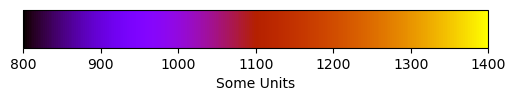

In [12]:
import matplotlib.pyplot as plt
import matplotlib as mpl

fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

#cmap = mpl.cm.cool
cmap=mpl.cm.gnuplot
norm = mpl.colors.Normalize(vmin=800, vmax=1400)

fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             cax=ax, orientation='horizontal', label='Some Units')

#Dark-Violet-Magenta-DarkOrange-Golden-Yellow

Of course it makes much more sense to use one colormap with
a uniform quantitative meaning, and that may well
tell an important cross-attribute story:

In [13]:
ct_agency_borough[["NYPD","DOT","HPD"]].style.background_gradient(
    subset=["NYPD","DOT","HPD"], cmap="coolwarm")

Agency,NYPD,DOT,HPD
Borough,,,
BRONX,1933,2605,11493
BROOKLYN,4886,5313,13871
MANHATTAN,3657,4182,7866
QUEENS,4154,4164,4986
STATEN ISLAND,663,1123,851


Expanding the view by one column:

In [14]:
ct_agency_borough[["NYPD","DOT","HPD","DOF"]].style.background_gradient(
    subset=["DOT","NYPD","HPD","DOF"], cmap="coolwarm"
)

Agency,NYPD,DOT,HPD,DOF
Borough,,,,
BRONX,1933,2605,11493,78
BROOKLYN,4886,5313,13871,149
MANHATTAN,3657,4182,7866,215
QUEENS,4154,4164,4986,116
STATEN ISLAND,663,1123,851,6


Displaying a histogram of a column.

In [15]:
ct_agency_borough[["DOF"]].style.bar(
    subset=["DOF"], color="dodgerblue")

Agency,DOF
Borough,
BRONX,78
BROOKLYN,149
MANHATTAN,215
QUEENS,116
STATEN ISLAND,6


## Analysis: What's the most common complaint type?

First of all, this is a really easy question to answer! There's a `.value_counts()` method that we can use:

In [16]:
complaint_counts = complaints['Complaint Type'].value_counts()
complaint_counts

HEATING                           14200
GENERAL CONSTRUCTION               7471
Street Light Condition             7117
DOF Literature Request             5797
PLUMBING                           5373
                                  ...  
Municipal Parking Facility            1
Tunnel Condition                      1
DHS Income Savings Requirement        1
Stalled Sites                         1
X-Ray Machine/Equipment               1
Name: Complaint Type, Length: 165, dtype: int64

In [14]:
type(complaint_counts)

pandas.core.series.Series

Since `complaints_counts` is a  Series (the complaint types are the index) ordered by number of complaints,  we can plot the numbers for the top complaint types, demonstrating visually what an outlier `Heating` is (Oh those NYC winters!).

<AxesSubplot:>

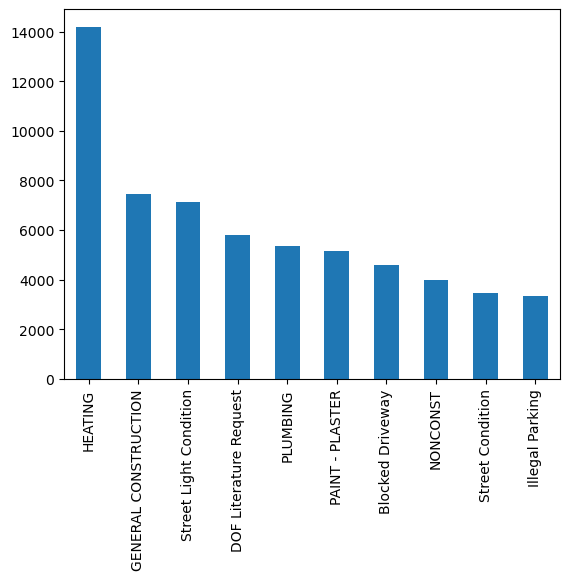

In [24]:
complaint_counts[:10].plot(kind='bar')

### Counting exercise

Find the distribution of complaint Statuses.  That is, write
an expression that produces a DataFrame or Series whose index
is the seven possible complaint Statuses  and whose
values are the number of complaints with each Status.

The solution is given a few cells down.  

To help you check your solution, here are the seven complaint statuses.

In [161]:
set(complaints['Status'])

{'Assigned',
 'Closed',
 'Email Sent',
 'Open',
 'Pending',
 'Started',
 'Unassigned'}

In [15]:
complaints['Status'].unique()

array(['Assigned', 'Open', 'Closed', 'Pending', 'Email Sent',
       'Unassigned', 'Started'], dtype=object)

In [108]:
sc = complaints['Status'].value_counts()
sc

Closed        57165
Open          43972
Assigned       6189
Pending        3165
Started         447
Email Sent      129
Unassigned        2
Name: Status, dtype: int64

## Keyword indexing, Alignment, and Elementwise Operations

We have been at pains to emphasize that DataFrames are like 2D arrays but with
keyword indexing instead of position based indexing.

One of the consequences of this is that shape is not the decisive factor in
determining when two dataFrames can be combined by an operation.

When two `numpy` arrays  of incompatible shapes are combined, the
result is an error:

In [55]:
A = np.ones((2,2))
B = np.zeros((3,3))

#ValueError: operands could not be broadcast together with shapes (2,2) (3,3) 
#A + B

We use an example of Jake Van der Plas's to show the same is not true of 
`pandas` DataFrames:

In [64]:
M = np.random.randint(0, 20, (2, 2))
A = pd.DataFrame(M,
                 columns=list('AB'))
A

,A,B
0,2,2
1,6,8


DataFrame A is 2x2.

In [65]:
M = np.random.randint(0, 10, (3, 3))
B = pd.DataFrame(M,
                 columns=list('ABC'))
B

,A,B,C
0,3,2,1
1,5,2,0
2,3,9,5


DataFrame B is 3x3.

Now we combine these seemingly incompatible matrices, A and B:

In [66]:
A+B

,A,B,C
0,5.0,4.0,NaN
1,11.0,10.0,NaN
2,NaN,NaN,NaN


Whereever one of the DataFrames was undefined for a column/row name,
we got a `NaN`.  More importantly, wherever we had positions that
were defined in both DataFrames, we performed addition.

The usefulness of this emerges when we we try to merge data
from two different sources, each of which may have gaps.
if we have our row and index labeling aligned, we may still be able to partially
unify the information.

What applies to operations on numbers applies equally well to operations on
strings.  Consider `df` an `df2`.

In [28]:
from pandas import DataFrame
df = DataFrame(data = BabyDataSet, columns=['Names', 'Gender', 'Births'])
df

,Names,Gender,Births
0,Bob,M,968
1,Jessica,F,155
2,Mary,F,77
3,John,M,578
4,Mel,M,973
5,Mel,F,45


In [29]:
df2 = df.loc[[0,3,4]]
df2

,Names,Gender,Births
0,Bob,M,968
3,John,M,578
4,Mel,M,973


The two DataFrames share column names and some index names; one column contains numbers, the
other strings.

The + operation --- call it addition --- is defined on both strings and numbers and will apply to any columns
that can be aligned; so examine the 0, 3, 4 rows in the output of the next cell.  Note that both 
columns undergo addition in those rows, while the unshared rows are NaN'ed.

In [71]:
df2 + df

,Names,Gender,Births
0,BobBob,MM,1936.0
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,JohnJohn,MM,1156.0
4,MelMel,MM,1946.0
5,NaN,NaN,NaN


This kind of behavior follows from being consistent about keyword indexing and from allowing
elementwise operations wherever possible, where teh definition of "possible" is expanded through the use of broadcasting:

In [72]:
df['Names'] + 'x'

0        Bobx
1    Jessicax
2       Maryx
3       Johnx
4        Melx
5        Melx
Name: Names, dtype: object

### Vectorized operations with string `Series`

It is worth pointing out that pandas also tries to allow the string analogue of vectorized functions (functions
that can be applied elementwise to arrays) whenever possible.
Typically, this requires invoking a "StringMethod" accessor on the Series instance.

For example, although `df['Names'].lower()` is an error,
we can acomplish what we're after here, lowercasing every element in the column, 
by first calling the `.str` method,
then `.lower()`.

The `.str()` method provides an accessor to string methods which will apply in a vectorized fashion:

In [30]:
df['Names'].str

In [31]:
df['Names'].str.lower()

0        bob
1    jessica
2       mary
3       john
4        mel
5        mel
Name: Names, dtype: object

We can also use Boolean conditions on strings elementwise to select rows:

In [32]:
df[df['Names'].str.startswith('M')]

,Names,Gender,Births
2,Mary,F,77
4,Mel,M,973
5,Mel,F,45


The following expression returns a Series of first elements, preserving the 
original indexing.

In [33]:
df['Names'].str[0]

0    B
1    J
2    M
3    J
4    M
5    M
Name: Names, dtype: object

Note the contrasting behavior if `[0]` isn't vectorized through `.str`:

In [78]:
df['Names'][0]

'Bob'

NaNs will as usual give rise to more NaNs, so .str methods will be robust to data gaps.

In [79]:
(df + df2)['Names'].str[0]

0      B
1    NaN
2    NaN
3      J
4      M
5    NaN
Name: Names, dtype: object

So if we want to collect data on correlations between name gender and name lastt letters, we can do:

In [119]:
df['Gender'].unique()

array(['M', 'F'], dtype=object)

In [34]:
for g in df['Gender'].unique():
    print(g)
    print(df[df['Gender']==g]['Names'].str[-1])
    print()

M
0    b
3    n
4    l
Name: Names, dtype: object

F
1    a
2    y
5    l
Name: Names, dtype: object



## Using groupby

Grouping is an operation that partitions the rows of a DataFrame into disjoint sets; it is a fundamental step in data analysis, often a first step.  For example, it is the first step in doing a cross-tabulation.  We will also see that it us the first step in creating a pivot table.  

As these examples suggest, we're mostly interested in grouping as one step in larger analytical task, but it is
useful to look at in isolation first, using the basic
`groupby` function that `pandas` provides.

Let's use a new dataset to illustrate, because it has some very natural
groupings.

In [58]:
import pandas as pd
import urllib.error

url_path  = 'https://gawron.sdsu.edu/python_for_ss/course_core/'
data_dir = 'data/'

github_url_path ='https://raw.githubusercontent.com/gawron/python-for-social-science/master/pandas/'
github_data_dir = 'datasets/'

nba_file = "nba.csv"
nba_file1 = "nba1.csv"
nba_file_url = url_path + data_dir + nba_file1


try:
    print(f"Reading {nba_file_url}")
    nba_df = pd.read_csv(nba_file_url)
except urllib.error.HTTPError:
    print("HTTPError Handled!")
    nba_file_url = github_url_path + github_data_dir + nba_file
    print(f"Reading {nba_file_url}")
    nba_df = pd.read_csv(nba_file_url)

Reading https://gawron.sdsu.edu/python_for_ss/course_core/data/nba1.csv
HTTPError Handled!
Reading https://raw.githubusercontent.com/gawron/python-for-social-science/master/pandas/datasets/nba.csv


Each row contains information about one current player. The team rosters are listed in alphabetical order of team name, with the players in alphabetical order by name
within the teams.

In [57]:
nba_df[:5]

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0


We are going to use it to find out about team salaries by position, height by position
and weight by position.

We group the rows by team and then show the alphabetically first player in each team.

In [2]:
gt = nba_df.groupby('Team')
# First member of each team grouop for first 5 teams
gt.first()[:5]

,Name,Number,Position,Age,Height,Weight,College,Salary
Team,,,,,,,,
Atlanta Hawks,Kent Bazemore,24.0,SF,26.0,6-5,201.0,Old Dominion,2000000.0
Boston Celtics,Avery Bradley,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
Brooklyn Nets,Bojan Bogdanovic,44.0,SG,27.0,6-8,216.0,Oklahoma State,3425510.0
Charlotte Hornets,Nicolas Batum,5.0,SG,27.0,6-8,200.0,Virginia Commonwealth,13125306.0
Chicago Bulls,Cameron Bairstow,41.0,PF,25.0,6-9,250.0,New Mexico,845059.0


Now a `DataFrameGroupBy` instance is **not** a DataFrame or a Series, making `groupby`
one of the few commonly used `pandas` analysis methods that doesn't return either:

In [15]:
type(gt)

pandas.core.groupby.generic.DataFrameGroupBy

This `DataFrameGroupBy`instance splits the player rows into subgroups, the players belonging to each team.

We can display one of those groups as follows:

In [16]:
# A particular group
gt.get_group('Utah Jazz')[:5]

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
442,Trevor Booker,Utah Jazz,33.0,PF,28.0,6-8,228.0,Clemson,4775000.0
443,Trey Burke,Utah Jazz,3.0,PG,23.0,6-1,191.0,Michigan,2658240.0
444,Alec Burks,Utah Jazz,10.0,SG,24.0,6-6,214.0,Colorado,9463484.0
445,Dante Exum,Utah Jazz,11.0,PG,20.0,6-6,190.0,NaN,3777720.0
446,Derrick Favors,Utah Jazz,15.0,PF,24.0,6-10,265.0,Georgia Tech,12000000.0


This, however, is an odd use of a `grouping` object. 
If all we were interested in was constructing a DataFrame limited to one team, we could accomplished that much more easily with:

In [17]:
nba_df[nba_df['Team'] == 'Utah Jazz'][:5]

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
442,Trevor Booker,Utah Jazz,33.0,PF,28.0,6-8,228.0,Clemson,4775000.0
443,Trey Burke,Utah Jazz,3.0,PG,23.0,6-1,191.0,Michigan,2658240.0
444,Alec Burks,Utah Jazz,10.0,SG,24.0,6-6,214.0,Colorado,9463484.0
445,Dante Exum,Utah Jazz,11.0,PG,20.0,6-6,190.0,NaN,3777720.0
446,Derrick Favors,Utah Jazz,15.0,PF,24.0,6-10,265.0,Georgia Tech,12000000.0


The benefit of the grouping object is that it makes various  comparisons based on the same grouping easier.
Suppose, for example, that  we were interested in comparing
average team ages and average team salary.  To make this more
interesting, let's say we're interested in looking at the
degree of correlation of age with salary team by team,
expecting that it will vary (some teams reward longevity
moire consistently than others).

Then we use our team grouping instance `gt` to look
at both variables (while throwing in something we're pretty sure is
unrelated as a kind of control).

In [34]:
mean_age_by_team = gt['Age'].mean()
mean_salary_by_team = gt['Salary'].mean()
mean_weight_by_team = gt['Weight'].mean()
comp = pd.DataFrame(dict(Age=mean_age_by_team,
                         Salary=mean_salary_by_team,
                         Weight=mean_weight_by_team))
comp[:5]

,Age,Salary,Weight
Team,,,
Atlanta Hawks,28.200000,4.860197e+06,221.266667
Boston Celtics,24.733333,4.181505e+06,219.466667
Brooklyn Nets,25.600000,3.501898e+06,215.600000
Charlotte Hornets,26.133333,5.222728e+06,220.400000
Chicago Bulls,27.400000,5.785559e+06,218.933333


And now it's quite easy to compute the correlations
among mean Team Age,  mean Team Salary, and Mean Team Weight:

In [35]:
#Uses pearsonr correlation
comp_corr = comp.corr()
#Add some color coding to highlight the strong correlations.
comp_corr.style.background_gradient(cmap='coolwarm')

,Age,Salary,Weight
Age,1.000000,0.716125,0.326419
Salary,0.716125,1.000000,0.327370
Weight,0.326419,0.327370,1.000000


The `DataFrame.corr()` method always produces a square NxN `DataFrame`.
When there are more than two columns, all pairwise correlations are computed. 

If we were only interested in two variables (columns), it would be more use `Series.corr`
and just compute a single scalar:

In [10]:
comp['Age'].corr(comp['Salary'], method='kendall')

0.6398163039514194

Let's focus on the creation of the DataFrame `comp`, the last step before we computed
the correlations.  In the present scenario, creating `comp` was just a means to an end.
But the steps we took to create it illustrate a recurring pattern in Data Analysis.

Creating the `DataFrame` `comp` was step three of a three-step process:

1.  Grouping by team (sometimes called **splitting**) 

    ```python
    gt = nba_df.groupby('Team')
    ```
   
2.  **Applying** a statistical aggregation function (`.mean(...)`)
    
    ```python
    a.
    mean_age_by_team = gt['Age'].mean()
    ```
    
    ```python
    b.
    mean_salary_by_team = gt['Salary'].mean()
    ```
    
    ```python
    c.
    mean_weight_by_team = gt['Weight'].mean()
    ```
    
3.  **Combining** the results into a `DataFrame`

    ```python
    pd.DataFrame(dict(Age=mean_age_by_team,
                      Salary=mean_salary_by_team,
                      Weight=mean_weight_by_team))
    ```
    
These three steps constitute what is called the **Split/Apply/Combine** strategy.  They arise often enough in Statistical Data Analysis to deserve
packaging into a single function called ``pivot_table``. For example,
to get the mean ages and salaries team by team, we do:

In [36]:
# Group the players into teams, take the mean age and salary for each time, 
# make a dataframe
pt = pd.pivot_table(nba_df,index='Team', values=["Salary","Age","Weight"],aggfunc='mean')
pt[:5]

,Age,Salary,Weight
Team,,,
Atlanta Hawks,28.200000,4.860197e+06,221.266667
Boston Celtics,24.733333,4.181505e+06,219.466667
Brooklyn Nets,25.600000,3.501898e+06,215.600000
Charlotte Hornets,26.133333,5.222728e+06,220.400000
Chicago Bulls,27.400000,5.785559e+06,218.933333


Tnis **pivot table** `pt` is equivalent to `comp` and can equally
well be used to compute the age/salary correlations:

In [37]:
pt.corr().style.background_gradient(cmap='coolwarm')

,Age,Salary,Weight
Age,1.000000,0.716125,0.326419
Salary,0.716125,1.000000,0.327370
Weight,0.326419,0.327370,1.000000


Ths is exactly the same `DataFrame` we saw before created in fewer steps.

We'll have quite a bit more to say about pivot tables in the
second `pandas` notebook.  For now let's continue exploring
the uses of grouping.

There are two  motivations for `pandas` to provide users with 
direct acces to `groupby` instances.

1.  A single `groupby` instance can support the analysis of multiple
variables, possibly with different aggregation functions  (in our
salart and age example we used mean twice).
2.  Grouping can also be done using more than one variable.  When combined with
aggregation functions, this naturally leads to what's called a **multi-level** index.
3. A Group instance can be used for custo aggregation operations that go beyond the 
operations packaged by pandas.

We have already illustrated point 1. We will illustrate point 3 below.

We now illustrate point 2 by grouping simultaneously by team and position:

In [3]:
gtp = nba_df.groupby(['Team','Position'])

In [22]:
gtp

All the things we did when grouping by one column we can do when grouping by two.
For example, select a value column and apply an aggregation function:

In [4]:
salary_ser  = gtp['Salary'].mean()

This gets us a new Series, with a multi-level index (indexing by team and position):

In [28]:
type(salary_ser)

pandas.core.series.Series

In [29]:
salary_ser.iloc[:29]

Team                 Position
Atlanta Hawks        C           7.585417e+06
                     PF          5.988067e+06
                     PG          4.881700e+06
                     SF          3.000000e+06
                     SG          2.607758e+06
Boston Celtics       C           2.450465e+06
                     PF          6.056987e+06
                     PG          4.974652e+06
                     SF          6.796117e+06
                     SG          2.107997e+06
Brooklyn Nets        C           1.031814e+07
                     PF          3.576205e+06
                     PG          2.915759e+06
                     SG          1.473351e+06
Charlotte Hornets    C           6.772240e+06
                     PF          4.685770e+06
                     PG          4.776152e+06
                     SF          6.331404e+06
                     SG          4.661406e+06
Chicago Bulls        C           1.042438e+07
                     PF          3.361007e+06
    

Choosing a team gets us a `Series` with a single level index:

In [96]:
salary_ser['Atlanta Hawks']

Position
C     7.585417e+06
PF    5.988067e+06
PG    4.881700e+06
SF    3.000000e+06
SG    2.607758e+06
Name: Salary, dtype: float64

To get one value, we do (parens optional but included for clarity).

In [97]:
salary_ser[('Atlanta Hawks','C')]

7585416.666666667

Summarizing:  We grouped the `nba_df` rows by team and position 
and selected one **value column** from the grouping to apply a 
statistical **aggregation function** (`.mean()`) to, resulting in a `Series`
indexed by two levels 
that gave us the mean values in the value column for each group.

That is:

In [98]:
nba_df.groupby(['Team','Position'])['Salary'].mean()[:6]

Team            Position
Atlanta Hawks   C           7.585417e+06
                PF          5.988067e+06
                PG          4.881700e+06
                SF          3.000000e+06
                SG          2.607758e+06
Boston Celtics  C           2.450465e+06
Name: Salary, dtype: float64

And of course all of the above steps can be combined into one pivot table
operation, the main difference being that we get
a `DataFrame` with one column rather than a `Series`.

In [8]:
salary_df = nba_df.pivot_table(values='Salary', index=['Team','Position'],aggfunc='mean')
salary_df

Salary
Team               Position              
Atlanta Hawks      C         7.585417e+06
                   PF        5.988067e+06
                   PG        4.881700e+06
                   SF        3.000000e+06
                   SG        2.607758e+06
...                                   ...
Washington Wizards C         8.163476e+06
                   PF        5.650000e+06
                   PG        9.011208e+06
                   SF        2.789700e+06
                   SG        2.839248e+06

[149 rows x 1 columns]

In [52]:
salary_df.loc['Boston Celtics']

,Salary
Position,
C,2.450465e+06
PF,6.056987e+06
PG,4.974652e+06
SF,6.796117e+06
SG,2.107997e+06


In [72]:
salary_df.loc['Boston Celtics','C']

2450465.0

Sample Interpretation: The Celtics pay their centers an average of 2.4 Million.

Now we can do things like the following.

Compare Golden State salaries  with Boston salaries position by position.

In [100]:
salary_df.loc['Boston Celtics']

,Salary
Position,
C,2.450465e+06
PF,6.056987e+06
PG,4.974652e+06
SF,6.796117e+06
SG,2.107997e+06


In [101]:
salary_df.loc['Golden State Warriors']

,Salary
Position,
C,6.541249e+06
PF,7.275312e+06
PG,8.457256e+06
SF,3.766367e+06
SG,6.316092e+06


In [102]:
salary_df.loc['Golden State Warriors'] > salary_df.loc['Boston Celtics']

,Salary
Position,
C,True
PF,True
PG,True
SF,False
SG,True


The Warriors pay more at every position but small forward (SF).

Each of these is a Series so in theory we can take the mean again:

In [6]:
salary_df = gtp['Salary'].mean()
print(f'{salary_df.loc["Boston Celtics"].mean():6,.2f}')
print(f'{salary_df.loc["Golden State Warriors"].mean():6,.2f}')

4,477,243.37
6,471,255.35


But these numbers have a somewhat strange interpretation.

In order to get the right interpretation of the above numbers,
think about why the following numbers aren't the same.

In [72]:
salary_means = gt['Salary'].mean()
print(f'{salary_means.loc["Boston Celtics"].mean():6,.2f}')
print(f'{salary_means.loc["Golden State Warriors"].mean():6,.2f}')

4,181,504.86
5,924,599.80


#### Working with multi-indexing (.xs(...), .unstack(...),  .stack(...))

We review what multi-indexing does.

In [16]:
salary_df

Salary
Team               Position              
Atlanta Hawks      C         7.585417e+06
                   PF        5.988067e+06
                   PG        4.881700e+06
                   SF        3.000000e+06
                   SG        2.607758e+06
...                                   ...
Washington Wizards C         8.163476e+06
                   PF        5.650000e+06
                   PG        9.011208e+06
                   SF        2.789700e+06
                   SG        2.839248e+06

[149 rows x 1 columns]

This way of organizing the data makes it easy to look at the mean salaries for
any given team:

In [17]:
salary_df.loc['Atlanta Hawks']

,Salary
Position,
C,7.585417e+06
PF,5.988067e+06
PG,4.881700e+06
SF,3.000000e+06
SG,2.607758e+06


Doing the analagous selection with a player position is more complicated, because player positions
are at the lwoer level (level 1) of the multilevel index.  

In [ ]:
#KeyErrors (inner index level cant be accessed first)
#salary_df.loc['C']

However pandas does provide a way to do cross-sections defined by lower levels in a multilevel
index.  Here are the team-by-team mean salaries for Centers.  Note that levels have names,
in this case inherited from the columns used to create the levels, and the level being used
for the cross-section is being specified by its name `level="Position"`; `level=1` is equivalent.


In [16]:
# salary_df.xs("C", level=1)[:5] is equivalent
salary_df.xs("C", level="Position")[:5]

Team
Atlanta Hawks        7.585417e+06
Boston Celtics       2.450465e+06
Brooklyn Nets        1.031814e+07
Charlotte Hornets    6.772240e+06
Chicago Bulls        1.042438e+07
Name: Salary, dtype: float64

An alternative to using `.xs()` is to swap the outer and inner levels:

In [17]:
# salary_df.swaplevel(0, 1).loc['C'][:5] is equivalent
salary_df.swaplevel("Team", "Position").loc['C'][:5]

Team
Atlanta Hawks        7.585417e+06
Boston Celtics       2.450465e+06
Brooklyn Nets        1.031814e+07
Charlotte Hornets    6.772240e+06
Chicago Bulls        1.042438e+07
Name: Salary, dtype: float64

Now we can also, if we desire, change our minds about having a multi-index.

The relevant method is `unstack`.  Here, we specify -1 (innermost level).  The change is not earthshaking.  Now, instead
of multi-level index, we have multi level columns.  No information
has been gained or lost.

In [21]:
salary_df.unstack(level="Position")[:6]

Position,C,PF,PG,SF,SG
Team,,,,,
Atlanta Hawks,7.585417e+06,5.988067e+06,4.881700e+06,3000000.0,2.607758e+06
Boston Celtics,2.450465e+06,6.056987e+06,4.974652e+06,6796117.0,2.107997e+06
Brooklyn Nets,1.031814e+07,3.576205e+06,2.915759e+06,NaN,1.473351e+06
Charlotte Hornets,6.772240e+06,4.685770e+06,4.776152e+06,6331404.0,4.661406e+06
Chicago Bulls,1.042438e+07,3.361007e+06,1.117153e+07,1958160.0,5.717549e+06
Cleveland Cavaliers,6.828957e+06,1.394101e+07,6.551592e+06,11958888.0,3.761809e+06


In [64]:
#salary_df.unstack(level="Position") is equivalent
sdfu = salary_df.unstack(level=-1)
sdfu[:6]

Salary                                          \
Position                        C            PF            PG          SF   
Team                                                                        
Atlanta Hawks        7.585417e+06  5.988067e+06  4.881700e+06   3000000.0   
Boston Celtics       2.450465e+06  6.056987e+06  4.974652e+06   6796117.0   
Brooklyn Nets        1.031814e+07  3.576205e+06  2.915759e+06         NaN   
Charlotte Hornets    6.772240e+06  4.685770e+06  4.776152e+06   6331404.0   
Chicago Bulls        1.042438e+07  3.361007e+06  1.117153e+07   1958160.0   
Cleveland Cavaliers  6.828957e+06  1.394101e+07  6.551592e+06  11958888.0   

                                   
Position                       SG  
Team                               
Atlanta Hawks        2.607758e+06  
Boston Celtics       2.107997e+06  
Brooklyn Nets        1.473351e+06  
Charlotte Hornets    4.661406e+06  
Chicago Bulls        5.717549e+06  
Cleveland Cavaliers  3.761809e+06

To look at Center salaries, we do:

In [65]:
#The following line is an error because we need to access the first column level first.
#sdfu['C']
sdfu['Salary', 'C'][:6]

Team
Atlanta Hawks          7.585417e+06
Boston Celtics         2.450465e+06
Brooklyn Nets          1.031814e+07
Charlotte Hornets      6.772240e+06
Chicago Bulls          1.042438e+07
Cleveland Cavaliers    6.828957e+06
Name: (Salary, C), dtype: float64

Unstacking from a multiindex is not limited to the inner most level (`level=-1`).
We can also unstack  the first (outer) level (`level=0`), which gives us `team` columns,
leaving the positions as the index.

In [29]:
#salary_df.unstack(level="Team") is equivalent
sdfu2 = salary_df.unstack(level=0)
sdfu2

Salary                                                 \
Team     Atlanta Hawks Boston Celtics Brooklyn Nets Charlotte Hornets   
Position                                                                
C         7.585417e+06   2.450465e+06  1.031814e+07      6.772240e+06   
PF        5.988067e+06   6.056987e+06  3.576205e+06      4.685770e+06   
PG        4.881700e+06   4.974652e+06  2.915759e+06      4.776152e+06   
SF        3.000000e+06   6.796117e+06           NaN      6.331404e+06   
SG        2.607758e+06   2.107997e+06  1.473351e+06      4.661406e+06   

                                                                            \
Team     Chicago Bulls Cleveland Cavaliers Dallas Mavericks Denver Nuggets   
Position                                                                     
C          10424380.00        6.828957e+06       2332019.00   1.617240e+06   
PF          3361007.40        1.394101e+07       3052835.00   7.024978e+06   
PG         11171532.00        6.551592e+06       4418183.25   3.482413e+06   
SF          1958160.00        1.195889e+07       8231051.00   9.327590e+06   
SG          5717549.25        3.761809e+06       8928250.00   9.300817e+05   

                                                ...                        \
Team     Detroit Pistons Golden State Warriors  ... Oklahoma City Thunder   
Position                                        ...                         
C              4090697.0          6.541249e+06  ...          6.303143e+06   
PF             4000000.0          7.275312e+06  ...          5.821013e+06   
PG             4260003.0          8.457256e+06  ...          9.382869e+06   
SF             5173600.0          3.766367e+06  ...          8.599621e+06   
SG             4580880.0          6.316092e+06  ...          3.207058e+06   

                                                         \
Team     Orlando Magic Philadelphia 76ers  Phoenix Suns   
Position                                                  
C           6098638.00         4604820.00  5.630172e+06   
PF          4688068.25         2889265.50  3.267500e+06   
PG          4286164.25         1141104.25  7.000750e+06   
SF           845059.00          922529.50  2.582424e+06   
SG          3740735.00         1908358.00  1.423116e+06   

                                                                    \
Team     Portland Trail Blazers Sacramento Kings San Antonio Spurs   
Position                                                             
C                  4.470774e+06       8983410.00      3.724319e+06   
PF                 2.079564e+06        685076.00      1.059409e+07   
PG                 3.545614e+06       7256779.50      5.755732e+06   
SF                 5.468477e+06       4417455.50      8.775190e+06   
SG                 2.124524e+06       2794975.75      3.384923e+06   

                                                           
Team     Toronto Raptors     Utah Jazz Washington Wizards  
Position                                                   
C           3.105494e+06  1.674385e+06       8.163476e+06  
PF          2.978463e+06  6.338267e+06       5.650000e+06  
PG          6.836453e+06  2.442323e+06       9.011208e+06  
SF          6.225972e+06  6.146973e+06       2.789700e+06  
SG          5.350000e+06  5.405962e+06       2.839248e+06  

[5 rows x 30 columns]

And we can swing back to a multi level index with `stack`:

In [51]:
sdfu2.stack()

Salary
Position Team                            
C        Atlanta Hawks       7.585417e+06
         Boston Celtics      2.450465e+06
         Brooklyn Nets       1.031814e+07
         Charlotte Hornets   6.772240e+06
         Chicago Bulls       1.042438e+07
...                                   ...
SG       Sacramento Kings    2.794976e+06
         San Antonio Spurs   3.384923e+06
         Toronto Raptors     5.350000e+06
         Utah Jazz           5.405962e+06
         Washington Wizards  2.839248e+06

[149 rows x 1 columns]

Let's consider a use case, trimming some rows via the inner index.  

Let's say we want the same index levels as in `salary_df`, but with only guards (SG and PG).

We start with:

In [42]:
salary_df

Salary
Team               Position              
Atlanta Hawks      C         7.585417e+06
                   PF        5.988067e+06
                   PG        4.881700e+06
                   SF        3.000000e+06
                   SG        2.607758e+06
...                                   ...
Washington Wizards C         8.163476e+06
                   PF        5.650000e+06
                   PG        9.011208e+06
                   SF        2.789700e+06
                   SG        2.839248e+06

[149 rows x 1 columns]

We unstack, choose the columns we want to keep, and restack.

In [63]:
sdfu = salary_df.unstack(level=1)
sdfu[[("Salary","PG"),("Salary","SG")]].stack()[:6]


Salary
Team           Position              
Atlanta Hawks  PG        4.881700e+06
               SG        2.607758e+06
Boston Celtics PG        4.974652e+06
               SG        2.107997e+06
Brooklyn Nets  PG        2.915759e+06
               SG        1.473351e+06

#### Using multilevel indexing to represent 3D Data 

Pandas used to feature something called a Panel which was a 3D version of a DataFrame.
That has been removed.  The newer (and better) idea is to handle 3D data using
the kind of multi-level indexing we just encountered by grouping
with multiple variables. 

The nba data isn't very appropriate for this
brief digression, so let's cook up some 3D data to demonstrate that idea.

In [24]:
import numpy as np
a = np.arange(24).reshape((2, 4,3))
a.shape

(2, 4, 3)

In [4]:
a

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]],

       [[12, 13, 14],
        [15, 16, 17],
        [18, 19, 20],
        [21, 22, 23]]])

The array `a` has three dimensions, rows, columns, and layers.

Think of `a` as two 2D arrays, one laid on top of the other.
This is the top layer of `a`.

In [5]:
# a is a 3D numpy array.  Accessing 1 index returns a 2D array
a[0]

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

What we're going to do is flatten `a`, creating 6 columns,
to turn it into a 2D DataFrame, and then recapture the 3D structure
by introducing multilevel columns.

Here's how we get 6 columns of data: Concatenate the two layers of `a` in the axis 1 direction.

Recall from the `numpy_array_concatenation` notebook that `np.concatenate` takes the sequence of arrays to be concatenated as its first argument; also recall that `a` is a sequence of 2 2D arrays.

In [9]:
np.concatenate(a,axis=1)

array([[ 0,  1,  2, 12, 13, 14],
       [ 3,  4,  5, 15, 16, 17],
       [ 6,  7,  8, 18, 19, 20],
       [ 9, 10, 11, 21, 22, 23]])

We're going to transpose the data to facilitate more general indexing.

We'll choose leveled names for our 6 rows: The idea is to assign all the layer
one data to the `A` rows and all the layer 2 data to the "B" rows.

In [44]:
Ls = [(l1,l2) for l1 in "AB" for l2 in "abc"]
Ls

[('A', 'a'), ('A', 'b'), ('A', 'c'), ('B', 'a'), ('B', 'b'), ('B', 'c')]

Here is how to create the DataFrame.

In [28]:
import pandas as pd
Ls = [(l1,l2) for l1 in "AB" for l2 in "abc"]
new_index= pd.MultiIndex.from_tuples(Ls)
flattened_a = np.concatenate(a,axis=1)
df22 = pd.DataFrame(flattened_a.T,index=new_index)
df22

0   1   2   3
A a   0   3   6   9
  b   1   4   7  10
  c   2   5   8  11
B a  12  15  18  21
  b  13  16  19  22
  c  14  17  20  23

And as desired we get the layer-one information under "A":

In [29]:
df22.loc["A"]

,0,1,2,3
a,0,3,6,9
b,1,4,7,10
c,2,5,8,11


In [30]:
a[0].T

array([[ 0,  3,  6,  9],
       [ 1,  4,  7, 10],
       [ 2,  5,  8, 11]])

Getting cross-sections from other dimensions of the original data can be done by using
columns or using `.xs()`:

In [57]:
df22[0]

A  a     0
   b     1
   c     2
B  a    12
   b    13
   c    14
Name: 0, dtype: int64

Although a Series, this is 2D information because of the MultiIndex: 0,12 is the first row (`df22[0].xs('a',level=1)`) and 0,1,2 is the first column `df22[0]["A"]`).

It corresponds to the first 2D array in the row direction of `a`:

In [59]:
a[:,0,:].T

array([[ 0, 12],
       [ 1, 13],
       [ 2, 14]])

While a level 1 cross section captures the column dimension of `a`.

In [51]:
df22.xs('a',level=1)

,0,1,2,3
A,0,3,6,9
B,12,15,18,21


In [61]:
a[:,:,0]

array([[ 0,  3,  6,  9],
       [12, 15, 18, 21]])

So all of the 3D structure of `a` has been captured.

##### Custom aggregation operations

Point 3 in motivating `groupby` was that that group objects could be used to implement
custom aggregation operations.  We illustrate that with `GroupBy.transform(..)`.

The operation used is  **z_score**, otherwise referred to as
centering and scaling.  

```python
(x - x.mean())/x.std()
```

Below we group by team and then use z_score to  compute each player's age in standard deviation
units relative to his group.  A player whose age is above
the mean age of his team will have a positive Team Age;
a player below that mean in age will have a negative Team Age.

In [ ]:
f = lambda x: (x - x.mean())/x.std()
# Apply transform to team groups, creating a Seroes
new_col = gt[["Age"]].transform(f)
# Make it a column in the data
nba_df["Team Age"] = new_col

Show a few Celtics player with the new column:

In [52]:
nba_df[nba_df["Team"]=="Boston Celtics"][:4]

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,Team Age
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0,0.093891
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0,0.093891
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN,0.798069
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0,-0.962378


Show a few Warriors players with the new column:

In [53]:
nba_df[nba_df["Team"]=="Golden State Warriors"][:4]

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,Team Age
76,Leandro Barbosa,Golden State Warriors,19.0,SG,33.0,6-3,194.0,NaN,2500000.0,1.385888
77,Harrison Barnes,Golden State Warriors,40.0,SF,24.0,6-8,225.0,North Carolina,3873398.0,-0.952798
78,Andrew Bogut,Golden State Warriors,12.0,C,31.0,7-0,260.0,Utah,13800000.0,0.866180
79,Ian Clark,Golden State Warriors,21.0,SG,25.0,6-3,175.0,Belmont,947276.0,-0.692944


Compare 25-year old Avery Bradley playing for the Celtics with 25-year old Ian Clark
playing with the Warriors.  

Clark's Team Age is -.69, while Bradley's .09.  This indicates Bradley at 25
is very near his team's mean in Age, but slightly above it;
while Clark at 25 is well below it.  The Warriors
are an older team.

##### Understanding cross-tabulation

In [58]:
salary_df2 = gt['Salary'].mean()
print(f'{salary_df2.loc["Boston Celtics"]:6,.2f}')
print(f'{salary_df2.loc["Golden State Warriors"]:6,.2f}')

4,181,504.86
5,924,599.80


With the help of the grouping operation we're now in a position to be able
to characterize cross-tabulation a little more generally.

Grouping is the first step in cross-tabulation (which actually uses all
three steps of the split/apply/combine strategy).

Let's take our group-by-team-and-position object and compute the size of each group.

The result is a doubly indexed Series containing group sizes:

In [104]:
#  This with-construction executes code in a CONTEXT
#  which then goes away after the code block is exited.
#  Here we ask pandas to (just this once) print more than the default number of rows
with pd.option_context('display.max_rows', None):
    print(type(gtp['Name'].count()))
    print(gtp['Name'].count()[:19])

<class 'pandas.core.series.Series'>
Team               Position
Atlanta Hawks      C           3
                   PF          4
                   PG          2
                   SF          2
                   SG          4
Boston Celtics     C           3
                   PF          3
                   PG          4
                   SF          1
                   SG          4
Brooklyn Nets      C           2
                   PF          4
                   PG          3
                   SG          6
Charlotte Hornets  C           3
                   PF          3
                   PG          3
                   SF          1
                   SG          5
Name: Name, dtype: int64


This is exactly the same information we would get with a cross-tabulation, except that the
result is packaged in a singly indexed DataFrame with multiple columns:

In [69]:
tp_ct = pd.crosstab(nba_df['Team'], nba_df['Position'],margins=True)
print(type(tp_ct))
tp_ct[:6]

<class 'pandas.core.frame.DataFrame'>


Position,C,PF,PG,SF,SG,All
Team,,,,,,
Atlanta Hawks,3,4,2,2,4,15
Boston Celtics,3,3,4,1,4,15
Brooklyn Nets,2,4,3,0,6,15
Charlotte Hornets,3,3,3,1,5,15
Chicago Bulls,2,5,2,2,4,15
Cleveland Cavaliers,3,2,3,2,5,15


In fact, we can get from the `Series` created by `groupby().count()` to (very nearly) the 
`DataFrame` created by `crosstab`  by doing an unstack:

In [70]:
print(type(gtp['Name'].count().unstack()))
gtp['Name'].count().unstack()[:6]

<class 'pandas.core.frame.DataFrame'>


Position,C,PF,PG,SF,SG
Team,,,,,
Atlanta Hawks,3.0,4.0,2.0,2.0,4.0
Boston Celtics,3.0,3.0,4.0,1.0,4.0
Brooklyn Nets,2.0,4.0,3.0,NaN,6.0
Charlotte Hornets,3.0,3.0,3.0,1.0,5.0
Chicago Bulls,2.0,5.0,2.0,2.0,4.0
Cleveland Cavaliers,3.0,2.0,3.0,2.0,5.0


Pandas data can easily and cheaply be manipulated into different forms. Along
with that capability comes the possibility of accomplishing the same thing
in different ways, as we did with the cross-tabulation example. In many cases,
there is no right way; it doesn't matter which way we choose to get things done.
We want to think of Pandas as a tool set for providing different views on data.
To get to those views we may need to pass through different Pandas types, as we did
in these last few examples, moving between DataFrames, Groupby instances, Series instances,
and back to DataFrames.  We choose whatever representation works for the data analysis 
task at hand, whether it's tabular display, aggregation functions, or plotting.

Turning specifically to cross-tabulation,
it's always useful to think of cross-tabulation in terms of the split/apply/combine strategy,
which we've emphasized in this part of the notebook by using `groupby`. 

1.  **Splitting** the data into the groups defined by the input sequences.
2.  **Applying** the operation of counting to the groups.
3.  **Combining** the results into a DataFrame.

We will return to the split/apply/combine strategy in part two of the
pandas introduction.



## Exercises combining everything we've learned in Part One.

Try answering the following questions.  Note.  You may or may not have to use `groupby` method in your answers.  Even if you know how to use 
pandas `pivot_table` function, try to avoid using that.
Answers follow a few cells down.

1.  How many NBA players weigh under 220?
1.  By position, how many players weigh under 220?  How many do not?   In other words, create a DataFrame whose index is position with two columns, False and True, which contain the counts of the players under and not under 220.
1.  What is the average weight of Centers in the league? Which position is heavier on average, Center or Power Forward?
1.  What is the average height of Centers in the league? Which position is taller on average, Center or Power Forward?  Note: This is not just a boring minor variation on the previous question.  There is a complication.
3.  What position earns the highest salary on average?
4.  What colleges have supplied the most current NBA players?  How many colleges
have supplied only one NBA player?

#### Q1 How many NBA players weigh under 220?

In [96]:
len(nba_df[nba_df['Weight']<220])

205

#### Q2 By position, how many NBA players weigh under 220?

Can we make this a cross tabulation question?

Just cross tab the position column with the "weighs under 220" column.
Whoops, we don't have one.

Se we make one, 
using a Boolean constraint to create one (we don't need to make it an official column). 
Then we do a cross-tabulation.

In [106]:
# a virtual new column containing Booleans
under_220 = nba_df['Weight']<220
wt_pos_ct = pd.crosstab(nba_df['Position'],under_220)
wt_pos_ct

Weight,False,True
Position,,
C,78,0
PF,98,2
PG,1,91
SF,54,31
SG,21,81


In [107]:
# Note the above answer is fine. But it's nice to supply a column name for our bogus column
# to clarify what's being shown
wt_pos_ct = pd.crosstab(nba_df['Position'],under_220,colnames=['Under 220'])
wt_pos_ct

Under 220,False,True
Position,,
C,78,0
PF,98,2
PG,1,91
SF,54,31
SG,21,81


#### Q3 What is the average weight of Centers in the league? Which position is heavier on average, Center or Power Forward?

This can be answered as follows:

In [108]:
# create a group of rows
centers = nba_df[nba_df['Position'] == 'C']
# Do your statistical operation
c_mean= centers['Weight'].mean()
c_mean

254.2051282051282

In [109]:
# create a group of rows
pfs = nba_df[nba_df['Position'] == 'PF']
# Do your statistical operation
pf_mean = pfs['Weight'].mean()
pf_mean

240.43

In [110]:
c_mean>pf_mean

True

But since we have to the same
mean operation on more than one position,
let's look at some answers that work for all positions simultaneously,

In [112]:
gp = nba_df.groupby('Position')
weight_by_position = gp['Weight'].mean()
# This is a Series
weight_by_position                  

Position
C     254.205128
PF    240.430000
PG    189.478261
SF    221.776471
SG    206.686275
Name: Weight, dtype: float64

In [113]:
#Q1
print(weight_by_position['C'])
#Q2
print(weight_by_position['C'] > weight_by_position['SF'])

254.2051282051282
True


In [52]:
# Note also: This one is a natural pivot table question, 
# with `weight_by_position` a DataFrame, not a Series

weight_by_position_df  = pd.pivot_table(nba_df,index='Position',
                                        values='Weight',aggfunc='mean')
weight_by_position_df

,Weight
Position,
C,254.205128
PF,240.430000
PG,189.478261
SF,221.776471
SG,206.686275


Visually:

<AxesSubplot:xlabel='Position'>

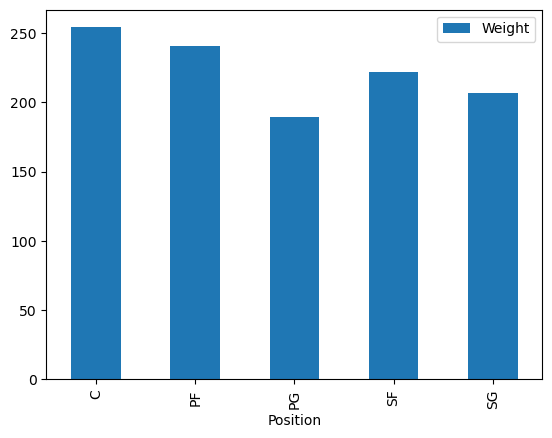

In [53]:
weight_by_position_df.plot(kind="bar")

Note:  This is a bad visualization because all the positions have means over 160, but we
are cluttering most of the visual real estate with the range between 0 and 160 pounds, shrinking the region where th real contrasts lie.  This is easily fixed:

<AxesSubplot:xlabel='Position'>

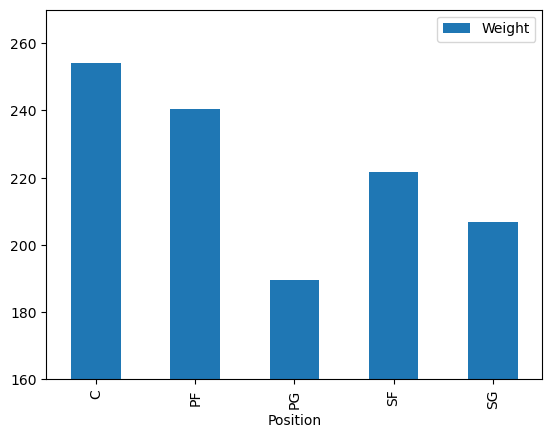

In [54]:
weight_by_position_df.plot(kind="bar",ylim=[160,270])

In [115]:
print(weight_by_position_df.loc['C','Weight'])
print()
print(weight_by_position_df.loc['C'] > weight_by_position_df.loc['SF'])

254.2051282051282

Weight    True
dtype: bool


#### Q4 What is the average height of Centers in the league?

It is a more challenging task to answer these same questions about heights.

This is because the entries in the height column are strings 
that need to be converted to numbers before a mean can be taken.

In [20]:
sample_height = nba_df['Height'].iloc[0]
sample_height

'6-2'

In [21]:
def str_height_to_float_height(str_height):
    if not isinstance(str_height,str):
        # If, for example, it's already a float (especially a NaN), leave it
        return str_height
    (ft, inch) = [int(s) for s in str_height.split('-')]
    return ft + inch/12

sample_height_float = str_height_to_float_height(sample_height)
sample_height_float

6.166666666666667

So we want to apply this function to every element of the Height Column.  Of course this were a vectorized `numpy` function we could just apply it to the `Series` and the right thing would happen, but it isn't; and it isn't a string method either, so we can't use `.str.str_height_to_float_height()`.  

The `pandas` DataFrame and Series method `apply` applies a function to each
row of `self` and returns the results as an instance
of the same class as `self` with the same index.

In the next cell we apply `str_height_to_float_height` 
to the Series `nba_df['Height']` and get back another Series.
We use it to make a new column.

In [22]:
nba_df['HeightFloats'] = nba_df['Height'].apply(str_height_to_float_height)
nba_df['HeightFloats']

0      6.166667
1      6.500000
2      6.416667
3      6.416667
4      6.833333
         ...   
453    6.250000
454    6.083333
455    7.250000
456    7.000000
457         NaN
Name: HeightFloats, Length: 458, dtype: float64

Now we do with this new column what we did with Weights.

In [23]:
height_by_position = gp['HeightFloats'].mean()
height_by_position

Position
C     6.941239
PF    6.809167
PG    6.202899
SF    6.632353
SG    6.461601
Name: HeightFloats, dtype: float64

Visually:

<AxesSubplot:xlabel='Position'>

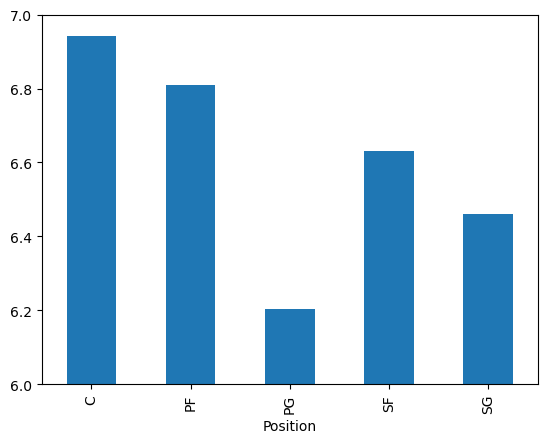

In [34]:
height_by_position.plot(kind="bar",ylim=[6,7])

In [121]:
#Height of centers
print(height_by_position['C'])
# Who's taller, centers or power forwards?
print(height_by_position['C'] > height_by_position['SF'])

6.941239316239316
True


The following might be a nice thing to do.  Turn the mean heights
back into normal-looking height strings.

In [122]:
def float_height_to_str(ft_height):
    if isinstance(ft_height,float) and np.isnan(ft_height):
        # If it's  a NaN, leave it alone
        return ft_height
    # np.floor returns an int (mathematically) but its type is still float
    (ft_int, inch_fl) = np.floor(ft_height), ft_height%1
    return str(round(ft_int)) + '-' + str(round(inch_fl * 12))

height_by_position.apply(float_height_to_str)

Position
C     6-11
PF    6-10
PG     6-2
SF     6-8
SG     6-6
Name: HeightFloats, dtype: object

#### Q5 What position earns the highest salary on average?

Going back to groups and statistical aggregation functions.

In [14]:
gp = nba_df.groupby('Position')
gp_salary_means = gp['Salary'].mean().sort_values(ascending=False)
gp_salary_means

Position
C     5.967052e+06
PG    5.077829e+06
SF    4.857393e+06
PF    4.562483e+06
SG    4.009861e+06
Name: Salary, dtype: float64

Which position is it?  Well it's in the index, so:

In [124]:
gp_salary_means.index[0]

'C'

And of course taking the means from a value column,
for row groups defined by some other column can also
be accomplished with `df.pivot_table()`.

In [16]:
# mean salary by position pivot table.
nba_ppt = pd.pivot_table(nba_df,index='Position', values='Salary',aggfunc='mean')
nba_ppt_std = nba_ppt.sort_values('Salary',ascending=False)
nba_ppt_std

,Salary
Position,
C,5.967052e+06
PG,5.077829e+06
SF,4.857393e+06
PF,4.562483e+06
SG,4.009861e+06


Visually:

<AxesSubplot:xlabel='Position'>

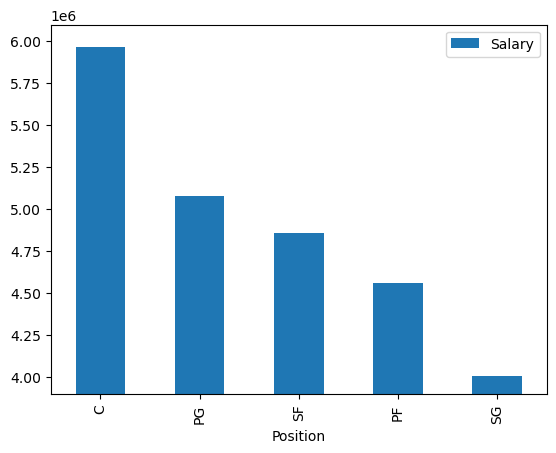

In [33]:
nba_ppt_std.plot(kind="bar",ylim=[3.9e6,6.1e6])

In [23]:
nba_ppt_std.index[0]

'C'

#### Q6 What colleges have supplied the most current NBA players?

Since there's no cross tabulation of multiple columns here, and the question
involves counting values that are  onfined to one column (`'College'`), this
question does not require either grouping or a pivot table.

The `'.value_counts()'` method does everything we need.

In [4]:
college_cts = nba_df['College'].value_counts()
college_cts[:5]

Kentucky          22
Duke              20
Kansas            18
North Carolina    16
UCLA              15
Name: College, dtype: int64

**Q4 (ctd.) How many colleges have supplied only one NBA player?**

We need to create a Series that contains the frequency of each count in `college_counts`.

Then we can retrieve the frequency for 1 NBA player.  That means using the
`.value_counts()` method on `college_cts`.  Since the values in the `college_ counts` Series are NBA player counts, applying `.value_counts()` again will produce a Series whose index is NBA player counts and whose values are the number of times each player count has occurred; in this case that means the number of colleges that have supplied that many NBA players.

The resulting Series is value-sorted by default:

In [36]:
college_cts.value_counts()

1     52
2     24
3     15
6      6
4      5
5      4
7      3
22     1
20     1
18     1
16     1
15     1
13     1
10     1
9      1
8      1
Name: College, dtype: int64

So 52 colleges have supplied exactly one NBA player; 24 have supplied 2; 15 have
supplied 3; and so on.  This is exactly the information visualized by a histogram of counts, so when we do a bar plot (`kind = "bar"`) of `college_cts.value_counts()`, we will get a histogram.  We sort the index to get a visually more sensible display:

<AxesSubplot:>

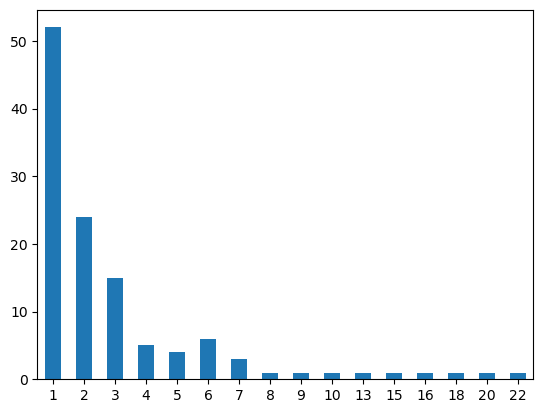

In [51]:
college_cts.value_counts().sort_index().plot(kind="bar",rot=0)

The expression for exactly the value we want is:

In [128]:
college_cts.value_counts().loc[1]

52

Note that this is not the same as:

In [55]:
college_cts.value_counts().iloc[1]

24

Be sure you understand why.

<style>
    @font-face {
        font-family: "Computer Modern";
        src: url('http://mirrors.ctan.org/fonts/cm-unicode/fonts/otf/cmunss.otf');
    }
    div.cell{
        width:800px;
        margin-left:16% !important;
        margin-right:auto;
    }
    h1 {
        font-family: Helvetica, serif;
    }
    h4{
        margin-top:12px;
        margin-bottom: 3px;
       }
    div.text_cell_render{
        font-family: Computer Modern, "Helvetica Neue", Arial, Helvetica, Geneva, sans-serif;
        line-height: 145%;
        font-size: 130%;
        width:800px;
        margin-left:auto;
        margin-right:auto;
    }
    .CodeMirror{
            font-family: "Source Code Pro", source-code-pro,Consolas, monospace;
    }
    .text_cell_render h5 {
        font-weight: 300;
        font-size: 22pt;
        color: #4057A1;
        font-style: italic;
        margin-bottom: .5em;
        margin-top: 0.5em;
        display: block;
    }
    
    .warning{
        color: rgb( 240, 20, 20 )
        }  